In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# ds1 = load_dataset("jordane95/msmarco-passage-corpus-with-query")
# ds2 = load_dataset("SetFit/insincere-questions")
ds3 = load_dataset("anon-betterbench/betterbench-b1-all-questions")

In [17]:
df3 = ds3['train'].to_pandas()

In [18]:
df3.head()

,title,chunk_uuid,chunk_location_id,chunk_size,chunk,summary,document_type,document_name,unique_document_id,source_text,...,reasoning,kind,estimated_difficulty,generating_model,citation_match_statistics,question_identifier,previous_chunk_uuid,previous_chunk,next_chunk_uuid,next_chunk
0,Three ways McKinsey is partnering to transform...,2199f6af-4f4f-46da-ab11-a5d164d3e92d,0,1354,"September 27, 2024A projected 80 percent of si...",This document highlights McKinsey's efforts to...,corporate,mckinsey_blog_post,f3370f14-180d-4375-8255-7c41417a61c9,# Three ways McKinsey is partnering to transfo...,...,The chunk describes the Mentu program as being...,analytical,3,gpt-4o-mini,"{'match_ratio_mean': 1.0, 'match_ratio_median'...",6d19739f-9d9a-419a-bb36-00bfc9fe0c6d,None,"No previous chunk, end of document.",89de7b59-4f68-486e-b800-ec9956b3cd8f,"“Every mission is highly relevant, and student..."
1,Three ways McKinsey is partnering to transform...,2199f6af-4f4f-46da-ab11-a5d164d3e92d,0,1354,"September 27, 2024A projected 80 percent of si...",This document highlights McKinsey's efforts to...,corporate,mckinsey_blog_post,f3370f14-180d-4375-8255-7c41417a61c9,# Three ways McKinsey is partnering to transfo...,...,The chunk explicitly states that the lack of r...,analytical,4,gpt-4o-mini,"{'match_ratio_mean': 1.0, 'match_ratio_median'...",633b998e-1809-44cc-811a-0bc822cf4634,None,"No previous chunk, end of document.",89de7b59-4f68-486e-b800-ec9956b3cd8f,"“Every mission is highly relevant, and student..."
2,Three ways McKinsey is partnering to transform...,2199f6af-4f4f-46da-ab11-a5d164d3e92d,0,1354,"September 27, 2024A projected 80 percent of si...",This document highlights McKinsey's efforts to...,corporate,mckinsey_blog_post,f3370f14-180d-4375-8255-7c41417a61c9,# Three ways McKinsey is partnering to transfo...,...,This question encourages the application of in...,application,4,gpt-4o-mini,"{'match_ratio_mean': 1.0, 'match_ratio_median'...",2fd7aeaf-7034-49f2-aa2b-f5253165157b,None,"No previous chunk, end of document.",89de7b59-4f68-486e-b800-ec9956b3cd8f,"“Every mission is highly relevant, and student..."
3,Three ways McKinsey is partnering to transform...,2199f6af-4f4f-46da-ab11-a5d164d3e92d,0,1354,"September 27, 2024A projected 80 percent of si...",This document highlights McKinsey's efforts to...,corporate,mckinsey_blog_post,f3370f14-180d-4375-8255-7c41417a61c9,# Three ways McKinsey is partnering to transfo...,...,This question encourages the exploration of va...,application,3,gpt-4o-mini,"{'match_ratio_mean': 1.0, 'match_ratio_median'...",45af7741-6cda-4241-849b-0254c6fbc136,None,"No previous chunk, end of document.",89de7b59-4f68-486e-b800-ec9956b3cd8f,"“Every mission is highly relevant, and student..."
4,Three ways McKinsey is partnering to transform...,2199f6af-4f4f-46da-ab11-a5d164d3e92d,0,1354,"September 27, 2024A projected 80 percent of si...",This document highlights McKinsey's efforts to...,corporate,mckinsey_blog_post,f3370f14-180d-4375-8255-7c41417a61c9,# Three ways McKinsey is partnering to transfo...,...,Understanding how AI is utilized in the Mentu ...,clarification,3,gpt-4o-mini,"{'match_ratio_mean': 1.0, 'match_ratio_median'...",42e72de5-47f3-4cf7-a020-5857d64396a0,None,"No previous chunk, end of document.",89de7b59-4f68-486e-b800-ec9956b3cd8f,"“Every mission is highly relevant, and student..."


In [19]:
df3 = df3[["title","chunk","document_type","document_analysis","chunk_analysis",
           "potential_question_directions","best_direction","question","answer","kind"]]
df3 = df3[df3["kind"] != "true-false"]
df3.reset_index(inplace = True)
df3.drop("index",axis = 1,inplace = True)

In [20]:
df3.head()

,title,chunk,document_type,document_analysis,chunk_analysis,potential_question_directions,best_direction,question,answer,kind
0,Three ways McKinsey is partnering to transform...,"September 27, 2024A projected 80 percent of si...",corporate,The document discusses McKinsey's initiatives ...,This chunk highlights the alarming statistic t...,[What are the implications of the statistic re...,The best question to ask is: 'How does the Men...,How does the Mentu program aim to engage stude...,The Mentu program aims to engage students by p...,analytical
1,Three ways McKinsey is partnering to transform...,"September 27, 2024A projected 80 percent of si...",corporate,The document outlines McKinsey's strategic par...,The chunk presents a critical issue in Latin A...,[What challenges do students in Latin America ...,The best question to ask is: 'What potential l...,What potential long-term effects could the lac...,The lack of reading comprehension among sixth ...,analytical
2,Three ways McKinsey is partnering to transform...,"September 27, 2024A projected 80 percent of si...",corporate,The document discusses McKinsey's initiatives ...,This chunk highlights the alarming statistic t...,[How could the Mentu program be adapted for us...,The best question to ask is: 'How can the succ...,How can the success of Mentu in Colombia infor...,The success of Mentu can inform educational st...,application
3,Three ways McKinsey is partnering to transform...,"September 27, 2024A projected 80 percent of si...",corporate,The document discusses McKinsey's initiatives ...,This chunk highlights the alarming statistic t...,[How could the Mentu program be adapted for us...,The best question to ask is: 'What strategies ...,What strategies could be implemented to increa...,Strategies to increase student engagement in p...,application
4,Three ways McKinsey is partnering to transform...,"September 27, 2024A projected 80 percent of si...",corporate,The document discusses McKinsey's initiatives ...,This chunk highlights the alarming statistic t...,[What specific skills does the Mentu program a...,The best question to ask is: 'How does the Men...,How does the Mentu program utilize AI in teach...,The Mentu program uses AI to create an engagin...,clarification


In [21]:
df3.groupby("document_type").count()

,title,chunk,document_analysis,chunk_analysis,potential_question_directions,best_direction,question,answer,kind
document_type,,,,,,,,,
corporate,21245,21245,21245,21245,21245,21245,21245,21245,21245
financial,5141,5141,5141,5141,5141,5141,5141,5141,5141
government,96246,96246,96246,96246,96246,96246,96246,96246,96246
health,35368,35368,35368,35368,35368,35368,35368,35368,35368
legal,56152,56152,56152,56152,56152,56152,56152,56152,56152
misc,19469,19469,19469,19469,19469,19469,19469,19469,19469
news,4976,4976,4976,4976,4976,4976,4976,4976,4976
research,55936,55936,55936,55936,55936,55936,55936,55936,55936


In [22]:
#analytical application clarification conceptual counterfactual edge case factual false premise open-ended	true-false

In [23]:
#Removed since this kind doesnt contains questions.
df3[df3["kind"] == "true-false"]["potential_question_directions"]

Series([], Name: potential_question_directions, dtype: object)

In [24]:
import re
def clean_latex(text):
    # Remove LaTeX commands like {\\displaystyle}, {\\text{}}, etc.
    cleaned_text = re.sub(r'\\displaystyle|\\text\{.*?\}', '', text)
    
    # Remove any LaTeX curly braces and unnecessary whitespaces
    cleaned_text = re.sub(r'\\[a-z]+|{|}', '', cleaned_text)
    
    # Replace LaTeX-specific representations like \\dots with their equivalent
    cleaned_text = re.sub(r'\\dots', '...', cleaned_text)
    
    # Remove multiple spaces introduced by LaTeX removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

In [25]:
# df3["chunk"] = [clean_latex(i) for i in list(df3["chunk"])]

In [26]:
temp = df3[df3["document_type"] == "research"]
temp.reset_index(inplace=True)

In [27]:
random_num = [1,20,100,500,1000,2000,5000,10000,20000,21000]
for i in random_num:
    print(temp["chunk"][i])
    print()
    print(temp["potential_question_directions"][i])
    print(temp["kind"][i])
    print()

% Template for Blind SLT-2024 paper; to be used with: % spconf.sty - ICASSP/ICIP LaTeX style file, and % IEEEbib.bst - IEEE bibliography style file. % -------------------------------------------------------------------------- % Source file for this paper's figures are here: https://docs.google.com/presentation/d/1z9X-JeSFIzI1VpzOLs2WTltX1I03vqQiLkUnE8YEBFE/edit?usp=sharing \documentclass{article} \usepackage{spconf,amsmath,graphicx} \usepackage{amsfonts} \usepackage{verbatim, tcolorbox} \usepackage{multicol} \usepackage{multirow} \usepackage{graphicx} \usepackage{hyperref} % Example definitions.

[]
application

% -------------------- \def\x{{\mathbf x}} \def\L{{\cal L}} \newcommand{\dilek}[1]{\textcolor{red}{[\textbf{Dilek:} #1]}} \newcommand{\suvodip}[1]{\textcolor{green}{[\textbf{SD:} #1]}} \newcommand{\jenny}[1]{\textcolor{blue} {[\textbf{Jenny:} #1]}} \title{Confidence Estimation for LLM-Based Dialogue State Tracking} \name{Yi-Jyun Sun, Suvodip Dey, Dilek Hakkani-Tür, Gokhan Tur }

In [32]:
from transformers import BartForConditionalGeneration, BartTokenizer, TrainingArguments
from tqdm import tqdm
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
tokenizedLengthList = []
for chunk in tqdm(list(df3["chunk"])):
    input_tokenized = tokenizer(chunk,return_tensors='pt')
    tokenizedLength = len(input_tokenized["input_ids"][0])
    tokenizedLengthList.append(tokenizedLength)

100%|██████████| 294533/294533 [05:46<00:00, 850.58it/s] 


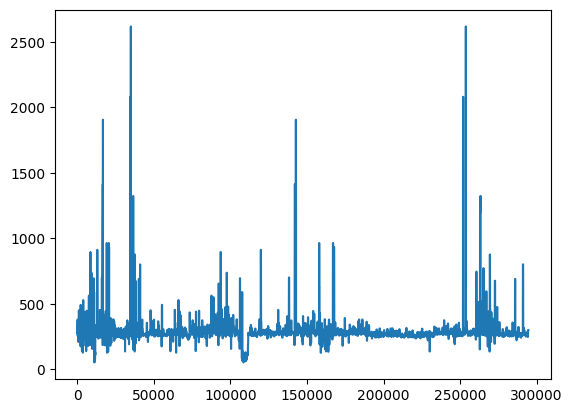

In [52]:
plt.plot(tokenizedLengthList)

In [50]:
df3["chunkTokenLength"] = tokenizedLengthList

In [56]:
tokenizedLengthList = []
for question in tqdm(list(df3["potential_question_directions"])):
    input_tokenized = tokenizer(str(question),return_tensors='pt')
    tokenizedLength = len(input_tokenized["input_ids"][0])
    tokenizedLengthList.append(tokenizedLength)

100%|██████████| 294533/294533 [01:56<00:00, 2529.97it/s]


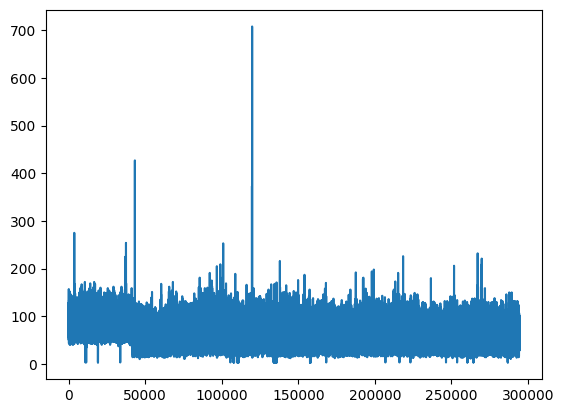

In [57]:
plt.plot(tokenizedLengthList)

In [58]:
df3["questionTokenLength"] = tokenizedLengthList

In [61]:
df3 = df3[df3["questionTokenLength"]<220]

In [63]:
df3 = df3[df3["chunkTokenLength"] < 1000]

In [65]:
df3.reset_index(inplace=True)

In [76]:
df3.sample(frac = 1)
df3.reset_index(inplace=True)
df3.drop("index",axis = 1,inplace = True)

C:\Users\Akshay\AppData\Local\Temp\ipykernel_7612\766189919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop("index",axis = 1,inplace = True)


In [78]:
df3.to_csv("../Data/CleanedDatasets/QuestionGenerator.csv")

In [2]:
df3 = pd.read_csv("../Data/CleanedDatasets/QuestionGenerator.csv")

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3["chunk"],df3["potential_question_directions"], test_size=0.1, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [4]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name = '../Saved_Models/QuestionGenerator/fine-tuned-bert-sentiment_{}'.format("2024_11_18_1")
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
model = model.to(device)

In [15]:
li = [110,20,50,100,345]
for idx in li:
    input_text = X_test.tolist()[idx]
    # print(input_text)
    # print()
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
    output = model.generate(
        input_ids, 
        max_length=220, 
        num_beams=1, 
        early_stopping=True, 
        no_repeat_ngram_size=2,  # Prevent repeating n-grams
        num_return_sequences=1,  # Number of sequences to return
        temperature=1,  # Sampling temperature
        top_k=0,  # Top-K sampling
        top_p=1.0  # Top-p (nucleus) sampling
    )
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    # print("True Answer",y_test.tolist()[idx])
    print("Pred Answer:", response)
    print()

Pred Answer: ['What are the limitations of naive fine-tuning according to human evaluators?'
 'How does the preference agent perform without access to zero-shot baseline information?']

Pred Answer: ["What is the dissent's approach to historical analysis in the context of the Second Amendment?"
 'How does the author argue that historical laws were inadequate in addressing domestic violence?'
 "What are the implications of a rigid adherence to history in constitutional interpretation, according to the text?"]

Pred Answer: ['What is the difference between LATE and ITT in the context of this study?'
 'Why are the coefficients on dietary diversity measures statistically insignificant in LARA?']

Pred Answer: ['What are the key features of the Sienna modeling framework that make it suitable for large-scale modeling and validation?'
 'How does the use of Julia and JuMP in the Grid Analysis and Visualization Interface enhance the capabilities of Sienza?']

Pred Answer: ["What is the signific

In [26]:
query = "The architecture of a generic GNN implements the following fundamental layers:[6]Permutation equivariant: a permutation equivariant layer maps a representation of a graph into an updated representation of the same graph. In the literature, permutation equivariant layers are implemented via pairwise message passing between graph nodes.[6][11] Intuitively, in a message passing layer, nodes update their representations by aggregating the messages received from their immediate neighbours. As such, each message passing layer increases the receptive field of the GNN by one hop.Local pooling: a local pooling layer coarsens the graph via downsampling. Local pooling is used to increase the receptive field of a GNN, in a similar fashion to pooling layers in convolutional neural networks. Examples include k-nearest neighbours pooling, top-k pooling,[26] and self-attention pooling.[27]Global pooling: a global pooling layer, also known as readout layer, provides fixed-size representation of the whole graph. The global pooling layer must be permutation invariant, such that permutations in the ordering of graph nodes and edges do not alter the final output.[28] Examples include element-wise sum, mean or maximum.It has been demonstrated that GNNs cannot be more expressive than the Weisfeiler–Leman Graph Isomorphism Test.[29][30] In practice, this means that there exist different graph structures (e.g., molecules with the same atoms but different bonds) that cannot be distinguished by GNNs. More powerful GNNs operating on higher-dimension geometries such as simplicial complexes can be designed.[31][32][10] As of 2022, whether or not future architectures will overcome the message passing primitive is an open research question.[11]"

In [28]:
input_text = query
print(input_text)
print()
input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
output = model.generate(
    input_ids, 
    max_length=220, 
    num_beams=5, 
    early_stopping=True, 
    no_repeat_ngram_size=2,  # Prevent repeating n-grams
    num_return_sequences=1,  # Number of sequences to return
    temperature=0.7,  # Sampling temperature
    top_k=50,  # Top-K sampling
    top_p=0.9  # Top-p (nucleus) sampling
)
response = tokenizer.decode(output[0], skip_special_tokens=True)
# print("True Answer",y_test.tolist()[idx])
print("Pred Answer:", response)
print()

The architecture of a generic GNN implements the following fundamental layers:[6]Permutation equivariant: a permutation equivariant layer maps a representation of a graph into an updated representation of the same graph. In the literature, permutation equivariant layers are implemented via pairwise message passing between graph nodes.[6][11] Intuitively, in a message passing layer, nodes update their representations by aggregating the messages received from their immediate neighbours. As such, each message passing layer increases the receptive field of the GNN by one hop.Local pooling: a local pooling layer coarsens the graph via downsampling. Local pooling is used to increase the receptive field of a GNN, in a similar fashion to pooling layers in convolutional neural networks. Examples include k-nearest neighbours pooling, top-k pooling,[26] and self-attention pooling.[27]Global pooling: a global pooling layer, also known as readout layer, provides fixed-size representation of the who

## Merge Data : get all files from data location and merge it into a single file

In [11]:
import os
import pandas as pd
from tqdm import tqdm

In [25]:
def get_all_files():
    # Get the list of all files and directories
    path = "../Data/GraphAgent/raw_data/"
    dir_list = os.listdir(path)
    # prints all files
    return dir_list

In [26]:
files = get_all_files()

In [27]:
# df = pd.DataFrame()
# for file in tqdm(files):
#     df = df._append(pd.read_csv("../Data/GraphAgent/{}".format(file),sep="\t"))

In [28]:
files[0]

'1.tsv'

In [35]:
for file in tqdm(files):
    df = pd.read_csv("../Data/GraphAgent/raw_data/{}".format(file),sep="\t")
    df.drop("All_Tags",axis = 1,inplace = True)
    df.to_csv('../Data/GraphAgent/cleaned_data/{}'.format(file),sep='\t', index=False)

In [32]:
df.head()

,Topic_Name,URL,Text_Index,Network
0,machine learning,https://en.wikipedia.org/wiki/machine_learning,"{0: 'Machine learning', 1: 'Supervised learnin...","['0->1', '0->2', '0->3', '0->4', '0->5', '0->6..."
1,automated machine learning,https://learn.microsoft.com/en-us/azure/machin...,{0: 'What is automated machine learning (AutoM...,"['0->1', '0->2', '0->3', '4->5', '4->6', '4->7..."
2,automated machine learning,https://www.automl.org/automl/,"{0: 'AutoML', 1: 'AutoML', 2: 'What is AutoML?...","['0', '1', '2->3', ['2->4->5', '2->4->6', '2->..."
3,automated machine learning,https://builtin.com/machine-learning/automl-au...,{0: 'AutoML: What Is Automated Machine Learnin...,"['0->1', '0->2', ['0->3->4', '0->3->5'], ['0->..."
4,automated machine learning,https://www.run.ai/guides/automl,"{0: 'AutoML', 1: 'Webinar: Transforming AI for...","['0->1', '0->2', '3', ['4->5->6', '4->5->7', '..."


In [85]:
df = pd.read_csv('../Data/GraphAgent/{}.tsv'.format("All_Files_Combined"),sep='\t')

In [87]:
df.to_csv('../Data/GraphAgent/{}.tsv'.format("All_Files_Combined"),sep='\t', index=False)

In [9]:
df.head()

,Topic_Name,URL,All_Tags,Text_Index,Network
0,machine learning,https://en.wikipedia.org/wiki/machine_learning,"[<h1 class=""firstHeading mw-first-heading"" id=...","{0: 'Machine learning', 1: 'Supervised learnin...","['0->1', '0->2', '0->3', '0->4', '0->5', '0->6..."
1,automated machine learning,https://learn.microsoft.com/en-us/azure/machin...,"[<h1 id=""what-is-automated-machine-learning-au...",{0: 'What is automated machine learning (AutoM...,"['0->1', '0->2', '0->3', '4->5', '4->6', '4->7..."
2,automated machine learning,https://www.automl.org/automl/,"[<h1>AutoML</h1>, <h1>AutoML</h1>, <h1>What is...","{0: 'AutoML', 1: 'AutoML', 2: 'What is AutoML?...","['0', '1', '2->3', ['2->4->5', '2->4->6', '2->..."
3,automated machine learning,https://builtin.com/machine-learning/automl-au...,"[<h1 class=""fw-bold fs-xl fs-md-4xl text-white...",{0: 'AutoML: What Is Automated Machine Learnin...,"['0->1', '0->2', ['0->3->4', '0->3->5'], ['0->..."
4,automated machine learning,https://www.run.ai/guides/automl,"[<h1 class=""guide-headline"">AutoML</h1>, <p cl...","{0: 'AutoML', 1: 'Webinar: Transforming AI for...","['0->1', '0->2', '3', ['4->5->6', '4->5->7', '..."


In [139]:
# df["Network"][0].replace("[","").replace("]","").replace("'","").split(",")

In [153]:
df["Text_Index"][0][1:5000]

"0: 'Machine learning', 1: 'Supervised learning', 2: 'Unsupervised learning', 3: 'Semi-supervised learning', 4: 'Self-supervised learning', 5: 'Reinforcement learning', 6: 'Meta-learning', 7: 'Online learning', 8: 'Batch learning', 9: 'Curriculum learning', 10: 'Rule-based learning', 11: 'Neuro-symbolic AI', 12: 'Neuromorphic engineering', 13: 'Quantum machine learning', 14: 'Classification', 15: 'Generative modeling', 16: 'Regression', 17: 'Clustering', 18: 'Dimensionality reduction', 19: 'Density estimation', 20: 'Anomaly detection', 21: 'Data cleaning', 22: 'AutoML', 23: 'Association rules', 24: 'Semantic analysis', 25: 'Structured prediction', 26: 'Feature engineering', 27: 'Feature learning', 28: 'Learning to rank', 29: 'Grammar induction', 30: 'Ontology learning', 31: 'Multimodal learning', 32: 'Apprenticeship learning', 33: 'Decision trees', 34: 'Ensembles\\nBagging\\nBoosting\\nRandom forest', 35: 'Bagging', 36: 'Boosting', 37: 'Random forest', 38: 'k-NN', 39: 'Linear regressio

In [7]:
df.groupby("URL").count()

,Topic_Name,All_Tags,Text_Index,Network
URL,,,,
http://147.162.114.155/articles/List_of_fluid_flows_named_after_people,1,1,1,1
http://147.162.114.155/articles/List_of_hydrodynamic_instabilities_named_after_people,1,1,1,1
http://4liberty.eu/parable-of-broken-window-as-public-policy-principle/,1,1,1,1
http://96kulimarathahistory.blogspot.com/,1,1,1,1
http://96kulimarathahistory.blogspot.com/2015/05/the-list-of-main-clans-and-their-sub.html,1,1,1,1
...,...,...,...,...
https://zoltandienes.com/poetry/why-johnny-cant-add/,1,1,1,1
https://zoox.com/,1,1,1,1
https://zumalo.com/epic/enhancing-human-intelligence-ii/,1,1,1,1


In [13]:
# fgf = pd.read_csv("../Data/GraphAgent/1.tsv",sep='\t')
# fgf.drop("All_Tags",axis = 1,inplace = True)
# fgf.to_csv("../Data/GraphAgent/test.tsv",sep='\t', index=False)

## Data Cleaning using Spark

In [26]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
from tqdm import tqdm
from pyspark.sql.types import StructType, StructField, StringType
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [3]:
# spark = SparkSession.builder.getOrCreate()

In [4]:
spark = SparkSession.builder \
    .master("local") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .appName("DataCleaning") \
    .getOrCreate()

In [27]:
def data_transformation_pyspark(row_iter):
    schema = StructType([StructField("Topic_Name", StringType(), True), StructField("URL", StringType(), True),\
                     StructField("Text_Index", StringType(), True), StructField("Network", StringType(), True)])
    d1 = spark.createDataFrame([(row_iter[0], row_iter[1], row_iter[2], row_iter[3])],schema=schema)
    d1 = d1.withColumn("Network",F.regexp_replace(F.col("Network"),r"[\[\]\']",""))\
           .withColumn("Network",F.split(F.col("Network"),","))
    index_data = d1.select("Text_Index",F.split(F.col("Text_Index"),"', ").alias("split"))
    index_data = index_data.drop("Text_Index")
    index_data = index_data.withColumn("split",F.explode("split"))
    index_data = index_data.withColumn("id",F.split(F.col("split"),": '").getItem(0))\
                            .withColumn("text",F.split(F.col("split"),": '").getItem(1))\
                            .drop(F.col("split"))\
                            .withColumn("id",F.regexp_replace(F.col("id"),"[\{\}\"]",""))\
                            .withColumn("id",F.col("id").cast('int'))
    index_data = index_data.withColumn("length_of_text",F.length(F.col("text")))\
                            .withColumn("num_of_words",F.array_size(F.split(F.col("text")," ")))
    network_data = d1.select(F.col("Network").alias("Network"))
    network_data = network_data.withColumn("Explode",F.explode(F.col("Network")))\
                            .drop(F.col("Network"))\
                            .withColumn("split",F.split(F.col("Explode"),"->"))
    grouped_network_data = network_data.withColumn("num_of_nodes",F.array_size(F.col("split")))\
                                        .groupby(F.col("num_of_nodes")).count()
    num_of_loops = grouped_network_data.orderBy(F.col("num_of_nodes"),ascending = False).take(1)[0][0]
    for loop in range(0,num_of_loops):
        network_data = network_data.withColumn(str(loop + 1), F.col("split").getItem(loop))
    joined_data = network_data
    for loop in range(1,num_of_loops+1):
        joined_data = index_data.join(joined_data,index_data["id"] == joined_data[str(loop)],"right")
        joined_data = joined_data.withColumn(str(loop),F.col("text"))
        joined_data = joined_data.drop("id","text","length_of_text","num_of_words")
    joined_data = joined_data.drop("Explode","split")
    if num_of_loops > 2:
        joined_data = joined_data.where(F.col("3")!='NULL')
    df = joined_data.toPandas()
    return df,num_of_loops

In [28]:
def dataframe_to_dict(df,num_of_loops):
    unique_keys = []
    uniques = []
    for i in range(1,num_of_loops+1):
        uniques.append(df[str(i)].unique().tolist())
    df.drop(df[df["2"].isin(['See also','References','Sources','Further reading','External links'])].index,axis = 0,inplace = True)
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True)
    parent_node = df["1"][0]
    new_dict = {parent_node:{}}
    for i in range(0,len(df)):
        counter = 0
        row = df.loc[i].tolist()
        row = [j for j in row if j != None]
        # print(i)
        # print("Levels==========================",len(row))
        for r in range(0,len(row)):
            #At first level, it will update the dict
            if r == 0:
                update_dict = new_dict[parent_node]
                # print(r,"at 0",update_dict)
            #If only 3 levels are present, it will create its own key and append
            elif r == (len(row)-1) and len(row) == 2:
                unique_keys.append("my_summary")
                if "my_summary" in list(update_dict.keys()):
                    update_dict["my_summary"].append(row[r])
                else:
                    update_dict["my_summary"] = [row[r]]
                # print(r,"at 1",update_dict)
            # When the loop reaches the last level, It will append the value
            elif r == (len(row)-1):
                try:
                    update_dict.append(row[r])
                    # print(r,"at 2",update_dict)
                except Exception as e:
                    # print(update_dict)
                    print(e)
            # When the loop is in mid levels
            else:
                unique_keys.append(row[r])
                try:
                    flag_aks = True 
                    if isinstance(update_dict,list):
                        for aks in range(0,len(update_dict)):
                            if isinstance(update_dict[aks],dict):
                                if row[r] in list(update_dict[aks].keys()):
                                    update_dict = update_dict[aks][row[r]]
                                    flag_aks = False
                                    break
                        if flag_aks:
                            update_dict.append({row[r]:[]})
                            update_dict = update_dict[-1][row[r]]
                    #This is the condition if the key is present and it is expecting a value in next loop
                    elif row[r] in list(update_dict.keys()) and r - (len(row)-2) == 0:
                        update_dict = update_dict[row[r]]
                        if isinstance(update_dict,dict):
                            update_dict[str(counter)] = []
                            update_dict = update_dict[str(counter)]
                        else:
                            pass
                    #If key is in dict
                    elif row[r] in list(update_dict.keys()):
                        update_dict = update_dict[row[r]]
                        # print(r,"Key present",update_dict)
                    #If key is not present
                    else:
                        #Expecting value in next loop
                        if r - (len(row)-2) == 0:
                            update_dict[row[r]] = []
                            update_dict = update_dict[row[r]]
                            # print(r,"Key not present but last key",update_dict)
                        # Expecting key in next loop
                        else:
                            update_dict[row[r]] = {}
                            update_dict = update_dict[row[r]]
                            # print(r,"Key not present",update_dict)
                except Exception as e:
                    print(e)
    return new_dict[parent_node],parent_node,unique_keys

In [29]:
def get_network_graph(parent_node,unique_keys):
    filter_dict = {parent_node:{}}
    for u in unique_keys:
        if u == parent_node:
            update_dict = filter_dict[parent_node]
        else:
            if u in list(update_dict.keys()):
                update_dict = update_dict[u]
            else:
                update_dict[u] = {}
                update_dict = update_dict[u]
    return filter_dict

In [30]:
def get_values(data,tracker,training_data):
    if isinstance(data,list):
        training_data["chunk"].append(data)
        training_data["path"].append(tracker)
        return training_data
    else:
        for idx,d in enumerate(data.keys()):
            tracker = tracker+"->"+d
            new_data = data[d]
            training_data = get_values(new_data,tracker,training_data)
            tracker = "->".join(tracker.split("->")[:-1])
            # print("New",tracker)
            # if idx == 3:
            #     break
        return training_data

In [31]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name = '../Saved_Models/QuestionGenerator/fine-tuned-bert-sentiment_{}'.format("2024_11_18_1")
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
model = model.to(device)
def generate_questions(input_text):
    # print(input_text)
    # print()
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
    output = model.generate(
        input_ids, 
        max_length=100, 
        num_beams=3, 
        early_stopping=True, 
        no_repeat_ngram_size=2,  # Prevent repeating n-grams
        num_return_sequences=1,  # Number of sequences to return
        temperature=0.7,  # Sampling temperature
        top_k=50,  # Top-K sampling
        top_p=0.9  # Top-p (nucleus) sampling
    )
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response.replace("[","").replace("]","")

In [32]:
def collect_questions(chunkList):
    questionList = []
    if len(chunkList) < 5:
        return questionList
    for chunk in chunkList:
        tempList = []
        if isinstance(chunk,list):
            #Generate question for individual chunk
            for context in chunk:
                context = str(context)
                context = context.replace("\\n","").replace("\\t","").replace("\\","")
                split_context = context.split(" ")
                if len(split_context) > 500:
                    for s in range(0,len(split_context),500):
                        context = " ".join(split_context[s:s+500])
                        tempList.append(generate_questions(context))
                else:
                    tempList.append(generate_questions(context))
            questionList.append(tempList)
        else:
            context = str(chunk)
            context = context.replace("\\n","").replace("\\t","").replace("\\","")
            split_context = context.split(" ")
            if len(split_context) > 500:
                for s in range(0,len(split_context),500):
                    context = " ".join(split_context[s:s+500])
                    tempList.append(generate_questions(context))
                questionList.append(tempList)
            else:
                questionList.append(generate_questions(str(chunk)))
    return questionList

In [33]:
def get_all_files():
    # Get the list of all files and directories
    path = "../Data/GraphAgent/cleaned_data/"
    dir_list = os.listdir(path)
    # prints all files
    return dir_list
files = get_all_files()

In [34]:
files = [int(i.split(".")[0]) for i in files]
files.sort()

In [ ]:
for file in files:
    data = spark.read.csv('../Data/GraphAgent/cleaned_data/{}.tsv'.format(str(file)),sep='\t',header=True)
    all_rows = data.collect()
    training_data_df = pd.DataFrame()
    for row_iter in tqdm(all_rows):
        try:
            link = row_iter[1]
            df,num_of_loops = data_transformation_pyspark(row_iter)
            new_dict,parent_node,unique_keys = dataframe_to_dict(df,num_of_loops)
            unique_keys = [i for i in unique_keys if len(i.split(" ")) < 30]
            filter_dict = get_network_graph(parent_node,unique_keys)
            network_str = str(filter_dict).replace("{}","").replace("'","").replace("\\n","").replace("\\","")
            training_data = {"path":[],"chunk":[]}
            training_data = get_values(new_dict[parent_node],"",training_data)
            df = pd.DataFrame.from_dict(training_data)
            df["path"] = parent_node+df["path"]
            df["network"] = [network_str]*len(df["path"])
            df["source"] = [link]*len(df["path"])
            # questionList = collect_questions(df["chunk"].tolist())
            # df["questions"] = questionList
            training_data_df = training_data_df._append(df)
        except Exception as e:
            print(e)
            continue
    training_data_df = training_data_df.explode('chunk')
    training_data["chunk"] = [str(i) for i in list(training_data["chunk"])]
    training_data_df.to_csv("../Data/GraphAgent/training_data/{}.tsv".format(str(file)),sep='\t', index=False)

 57%|█████▋    | 25/44 [00:58<00:43,  2.31s/it]

local variable 'update_dict' referenced before assignment


  7%|▋         | 3/46 [00:06<01:35,  2.22s/it]

0


 15%|█▌        | 7/46 [00:12<00:57,  1.48s/it]

list index out of range


 32%|███▏      | 19/60 [00:38<01:05,  1.59s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#39987, 2#40020]
   +- Project [Explode#39938, split#39942, 1#39987, 2#40020]
      +- Project [id#39923, text#39914, length_of_text#39926, num_of_words#39930, Explode#39938, split#39942, 1#39987, text#39914 AS 2#40020]
         +- Join RightOuter, (id#39923 = cast(2#39962 as int))
            :- Project [id#39923, text#39914, length_of_text#39926, array_size(split(text#39914,  , -1)) AS num_of_words#39930]
            :  +- Project [id#39923, text#39914, length(text#39914) AS length_of_text#39926]
            :     +- Project [cast(id#39920 as int) AS id#39923, text#39914]
            :        +- Project [regexp_replace(id#39911, [\{\}"], , 1) AS id#39920, text#39914]
            :           +- Project [id#39911, text#39914]
            :              +- Project [split#39909, id#39911, split(split#3990

 52%|█████▏    | 31/60 [01:02<00:46,  1.62s/it]

list index out of range


 63%|██████▎   | 38/60 [01:18<00:40,  1.84s/it]

list index out of range


 65%|██████▌   | 39/60 [01:18<00:30,  1.46s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#45777, 2#45810]
   +- Project [Explode#45728, split#45732, 1#45777, 2#45810]
      +- Project [id#45713, text#45704, length_of_text#45716, num_of_words#45720, Explode#45728, split#45732, 1#45777, text#45704 AS 2#45810]
         +- Join RightOuter, (id#45713 = cast(2#45752 as int))
            :- Project [id#45713, text#45704, length_of_text#45716, array_size(split(text#45704,  , -1)) AS num_of_words#45720]
            :  +- Project [id#45713, text#45704, length(text#45704) AS length_of_text#45716]
            :     +- Project [cast(id#45710 as int) AS id#45713, text#45704]
            :        +- Project [regexp_replace(id#45701, [\{\}"], , 1) AS id#45710, text#45704]
            :           +- Project [id#45701, text#45704]
            :              +- Project [split#45699, id#45701, split(split#4569

  3%|▎         | 2/74 [00:02<01:34,  1.32s/it]

list index out of range


 22%|██▏       | 16/74 [00:31<01:34,  1.62s/it]

list index out of range


 30%|██▉       | 22/74 [00:43<01:20,  1.55s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#57536]
   +- Project [Explode#57494, split#57498, 1#57536]
      +- Project [id#57479, text#57470, length_of_text#57482, num_of_words#57486, Explode#57494, split#57498, text#57470 AS 1#57536]
         +- Join RightOuter, (id#57479 = cast(1#57514 as int))
            :- Project [id#57479, text#57470, length_of_text#57482, array_size(split(text#57470,  , -1)) AS num_of_words#57486]
            :  +- Project [id#57479, text#57470, length(text#57470) AS length_of_text#57482]
            :     +- Project [cast(id#57476 as int) AS id#57479, text#57470]
            :        +- Project [regexp_replace(id#57467, [\{\}"], , 1) AS id#57476, text#57470]
            :           +- Project [id#57467, text#57470]
            :              +- Project [split#57465, id#57467, split(split#57465, : ', -1)[1] AS text#57470]
  

 31%|███       | 23/74 [00:45<01:23,  1.65s/it]

local variable 'update_dict' referenced before assignment


 34%|███▍      | 25/74 [00:48<01:12,  1.48s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#58175]
   +- Project [Explode#58133, split#58137, 1#58175]
      +- Project [id#58118, text#58109, length_of_text#58121, num_of_words#58125, Explode#58133, split#58137, text#58109 AS 1#58175]
         +- Join RightOuter, (id#58118 = cast(1#58153 as int))
            :- Project [id#58118, text#58109, length_of_text#58121, array_size(split(text#58109,  , -1)) AS num_of_words#58125]
            :  +- Project [id#58118, text#58109, length(text#58109) AS length_of_text#58121]
            :     +- Project [cast(id#58115 as int) AS id#58118, text#58109]
            :        +- Project [regexp_replace(id#58106, [\{\}"], , 1) AS id#58115, text#58109]
            :           +- Project [id#58106, text#58109]
            :              +- Project [split#58104, id#58106, split(split#58104, : ', -1)[1] AS text#58109]
  

 36%|███▋      | 27/74 [00:52<01:25,  1.81s/it]

local variable 'update_dict' referenced before assignment


 76%|███████▌  | 56/74 [01:54<00:29,  1.62s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#67803, 2#67836]
   +- Project [Explode#67754, split#67758, 1#67803, 2#67836]
      +- Project [id#67739, text#67730, length_of_text#67742, num_of_words#67746, Explode#67754, split#67758, 1#67803, text#67730 AS 2#67836]
         +- Join RightOuter, (id#67739 = cast(2#67778 as int))
            :- Project [id#67739, text#67730, length_of_text#67742, array_size(split(text#67730,  , -1)) AS num_of_words#67746]
            :  +- Project [id#67739, text#67730, length(text#67730) AS length_of_text#67742]
            :     +- Project [cast(id#67736 as int) AS id#67739, text#67730]
            :        +- Project [regexp_replace(id#67727, [\{\}"], , 1) AS id#67736, text#67730]
            :           +- Project [id#67727, text#67730]
            :              +- Project [split#67725, id#67727, split(split#6772

 85%|████████▌ | 63/74 [02:07<00:17,  1.62s/it]

list index out of range


 89%|████████▉ | 66/74 [02:12<00:11,  1.43s/it]

list index out of range


 99%|█████████▊| 73/74 [02:25<00:01,  1.69s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#71976]
   +- Project [Explode#71934, split#71938, 1#71976]
      +- Project [id#71919, text#71910, length_of_text#71922, num_of_words#71926, Explode#71934, split#71938, text#71910 AS 1#71976]
         +- Join RightOuter, (id#71919 = cast(1#71954 as int))
            :- Project [id#71919, text#71910, length_of_text#71922, array_size(split(text#71910,  , -1)) AS num_of_words#71926]
            :  +- Project [id#71919, text#71910, length(text#71910) AS length_of_text#71922]
            :     +- Project [cast(id#71916 as int) AS id#71919, text#71910]
            :        +- Project [regexp_replace(id#71907, [\{\}"], , 1) AS id#71916, text#71910]
            :           +- Project [id#71907, text#71910]
            :              +- Project [split#71905, id#71907, split(split#71905, : ', -1)[1] AS text#71910]
  

 25%|██▌       | 7/28 [00:15<00:45,  2.18s/it]

local variable 'update_dict' referenced before assignment


 39%|███▉      | 11/28 [00:24<00:38,  2.27s/it]

local variable 'update_dict' referenced before assignment


 46%|████▋     | 13/28 [00:27<00:26,  1.79s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#75630, 2#75663]
   +- Project [Explode#75581, split#75585, 1#75630, 2#75663]
      +- Project [id#75566, text#75557, length_of_text#75569, num_of_words#75573, Explode#75581, split#75585, 1#75630, text#75557 AS 2#75663]
         +- Join RightOuter, (id#75566 = cast(2#75605 as int))
            :- Project [id#75566, text#75557, length_of_text#75569, array_size(split(text#75557,  , -1)) AS num_of_words#75573]
            :  +- Project [id#75566, text#75557, length(text#75557) AS length_of_text#75569]
            :     +- Project [cast(id#75563 as int) AS id#75566, text#75557]
            :        +- Project [regexp_replace(id#75554, [\{\}"], , 1) AS id#75563, text#75557]
            :           +- Project [id#75554, text#75557]
            :              +- Project [split#75552, id#75554, split(split#7555

 50%|█████     | 14/28 [00:29<00:25,  1.81s/it]

0


 61%|██████    | 17/28 [00:34<00:19,  1.81s/it]

0


 34%|███▍      | 11/32 [00:21<00:32,  1.56s/it]

list index out of range


 38%|███▊      | 12/32 [00:23<00:33,  1.69s/it]

local variable 'update_dict' referenced before assignment


 69%|██████▉   | 22/32 [00:44<00:19,  1.93s/it]

local variable 'update_dict' referenced before assignment


 72%|███████▏  | 23/32 [00:46<00:17,  1.90s/it]

local variable 'update_dict' referenced before assignment


 81%|████████▏ | 26/32 [00:51<00:11,  1.84s/it]

local variable 'update_dict' referenced before assignment


 21%|██        | 8/39 [00:15<00:49,  1.61s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#90544, 2#90577]
   +- Project [Explode#90495, split#90499, 1#90544, 2#90577]
      +- Project [id#90480, text#90471, length_of_text#90483, num_of_words#90487, Explode#90495, split#90499, 1#90544, text#90471 AS 2#90577]
         +- Join RightOuter, (id#90480 = cast(2#90519 as int))
            :- Project [id#90480, text#90471, length_of_text#90483, array_size(split(text#90471,  , -1)) AS num_of_words#90487]
            :  +- Project [id#90480, text#90471, length(text#90471) AS length_of_text#90483]
            :     +- Project [cast(id#90477 as int) AS id#90480, text#90471]
            :        +- Project [regexp_replace(id#90468, [\{\}"], , 1) AS id#90477, text#90471]
            :           +- Project [id#90468, text#90471]
            :              +- Project [split#90466, id#90468, split(split#9046

 74%|███████▍  | 29/39 [00:56<00:14,  1.48s/it]

list index out of range


  2%|▏         | 1/41 [00:00<00:18,  2.22it/s]

list index out of range


 20%|█▉        | 8/41 [00:12<00:45,  1.37s/it]

list index out of range


 22%|██▏       | 9/41 [00:14<00:48,  1.52s/it]

local variable 'update_dict' referenced before assignment


 27%|██▋       | 11/41 [00:16<00:38,  1.28s/it]

list index out of range


 34%|███▍      | 14/41 [00:20<00:33,  1.25s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#101860, 2#101893]
   +- Project [Explode#101811, split#101815, 1#101860, 2#101893]
      +- Project [id#101796, text#101787, length_of_text#101799, num_of_words#101803, Explode#101811, split#101815, 1#101860, text#101787 AS 2#101893]
         +- Join RightOuter, (id#101796 = cast(2#101835 as int))
            :- Project [id#101796, text#101787, length_of_text#101799, array_size(split(text#101787,  , -1)) AS num_of_words#101803]
            :  +- Project [id#101796, text#101787, length(text#101787) AS length_of_text#101799]
            :     +- Project [cast(id#101793 as int) AS id#101796, text#101787]
            :        +- Project [regexp_replace(id#101784, [\{\}"], , 1) AS id#101793, text#101787]
            :           +- Project [id#101784, text#101787]
            :              +- Project [split

 44%|████▍     | 18/41 [00:27<00:32,  1.39s/it]

list index out of range


 54%|█████▎    | 22/41 [00:36<00:36,  1.90s/it]

local variable 'update_dict' referenced before assignment


 56%|█████▌    | 23/41 [00:38<00:33,  1.88s/it]

local variable 'update_dict' referenced before assignment


 68%|██████▊   | 28/41 [00:47<00:20,  1.61s/it]

list index out of range


 71%|███████   | 29/41 [00:47<00:15,  1.26s/it]

list index out of range


 19%|█▉        | 9/48 [00:19<01:20,  2.07s/it]

local variable 'update_dict' referenced before assignment


 29%|██▉       | 14/48 [00:29<01:11,  2.10s/it]

local variable 'update_dict' referenced before assignment


 52%|█████▏    | 25/48 [00:53<00:36,  1.59s/it]

list index out of range


 54%|█████▍    | 26/48 [00:53<00:27,  1.24s/it]

list index out of range


 69%|██████▉   | 33/48 [01:08<00:25,  1.71s/it]

list index out of range


 92%|█████████▏| 44/48 [01:29<00:08,  2.02s/it]

local variable 'update_dict' referenced before assignment


  5%|▍         | 2/42 [00:02<00:45,  1.15s/it]

list index out of range


 24%|██▍       | 10/42 [00:17<00:50,  1.58s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#125386, 2#125419]
   +- Project [Explode#125337, split#125341, 1#125386, 2#125419]
      +- Project [id#125322, text#125313, length_of_text#125325, num_of_words#125329, Explode#125337, split#125341, 1#125386, text#125313 AS 2#125419]
         +- Join RightOuter, (id#125322 = cast(2#125361 as int))
            :- Project [id#125322, text#125313, length_of_text#125325, array_size(split(text#125313,  , -1)) AS num_of_words#125329]
            :  +- Project [id#125322, text#125313, length(text#125313) AS length_of_text#125325]
            :     +- Project [cast(id#125319 as int) AS id#125322, text#125313]
            :        +- Project [regexp_replace(id#125310, [\{\}"], , 1) AS id#125319, text#125313]
            :           +- Project [id#125310, text#125313]
            :              +- Project [split

 50%|█████     | 21/42 [00:38<00:32,  1.55s/it]

list index out of range


 52%|█████▏    | 22/42 [00:39<00:24,  1.22s/it]

list index out of range


 66%|██████▌   | 42/64 [01:25<00:41,  1.87s/it]

local variable 'update_dict' referenced before assignment


 67%|██████▋   | 43/64 [01:27<00:38,  1.84s/it]

local variable 'update_dict' referenced before assignment


 72%|███████▏  | 46/64 [01:32<00:27,  1.54s/it]

list index out of range


 92%|█████████▏| 59/64 [01:57<00:08,  1.61s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#151057, 2#151090]
   +- Project [Explode#151008, split#151012, 1#151057, 2#151090]
      +- Project [id#150993, text#150984, length_of_text#150996, num_of_words#151000, Explode#151008, split#151012, 1#151057, text#150984 AS 2#151090]
         +- Join RightOuter, (id#150993 = cast(2#151032 as int))
            :- Project [id#150993, text#150984, length_of_text#150996, array_size(split(text#150984,  , -1)) AS num_of_words#151000]
            :  +- Project [id#150993, text#150984, length(text#150984) AS length_of_text#150996]
            :     +- Project [cast(id#150990 as int) AS id#150993, text#150984]
            :        +- Project [regexp_replace(id#150981, [\{\}"], , 1) AS id#150990, text#150984]
            :           +- Project [id#150981, text#150984]
            :              +- Project [split

 25%|██▌       | 20/79 [00:43<02:11,  2.23s/it]

local variable 'update_dict' referenced before assignment


 28%|██▊       | 22/79 [00:45<01:31,  1.60s/it]

list index out of range


 32%|███▏      | 25/79 [00:52<01:51,  2.06s/it]

local variable 'update_dict' referenced before assignment


 42%|████▏     | 33/79 [01:10<01:26,  1.89s/it]

list index out of range


 43%|████▎     | 34/79 [01:10<01:04,  1.44s/it]

list index out of range


 44%|████▍     | 35/79 [01:11<00:50,  1.14s/it]

list index out of range


 46%|████▌     | 36/79 [01:11<00:39,  1.09it/s]

list index out of range


 48%|████▊     | 38/79 [01:13<00:41,  1.00s/it]

list index out of range


 49%|████▉     | 39/79 [01:14<00:33,  1.19it/s]

list index out of range


 51%|█████     | 40/79 [01:14<00:28,  1.39it/s]

list index out of range


 52%|█████▏    | 41/79 [01:15<00:24,  1.57it/s]

list index out of range


 54%|█████▍    | 43/79 [01:17<00:30,  1.17it/s]

list index out of range


 56%|█████▌    | 44/79 [01:18<00:26,  1.33it/s]

list index out of range


 57%|█████▋    | 45/79 [01:18<00:22,  1.53it/s]

list index out of range


 58%|█████▊    | 46/79 [01:18<00:19,  1.73it/s]

list index out of range


 61%|██████    | 48/79 [01:22<00:30,  1.02it/s]

list index out of range


 62%|██████▏   | 49/79 [01:22<00:24,  1.22it/s]

list index out of range


 63%|██████▎   | 50/79 [01:22<00:20,  1.43it/s]

list index out of range


 65%|██████▍   | 51/79 [01:23<00:17,  1.61it/s]

list index out of range


 71%|███████   | 56/79 [01:32<00:32,  1.43s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#164632]
   +- Project [Explode#164590, split#164594, 1#164632]
      +- Project [id#164575, text#164566, length_of_text#164578, num_of_words#164582, Explode#164590, split#164594, text#164566 AS 1#164632]
         +- Join RightOuter, (id#164575 = cast(1#164610 as int))
            :- Project [id#164575, text#164566, length_of_text#164578, array_size(split(text#164566,  , -1)) AS num_of_words#164582]
            :  +- Project [id#164575, text#164566, length(text#164566) AS length_of_text#164578]
            :     +- Project [cast(id#164572 as int) AS id#164575, text#164566]
            :        +- Project [regexp_replace(id#164563, [\{\}"], , 1) AS id#164572, text#164566]
            :           +- Project [id#164563, text#164566]
            :              +- Project [split#164561, id#164563, split(split#164

 82%|████████▏ | 65/79 [01:50<00:21,  1.54s/it]

list index out of range


 84%|████████▎ | 66/79 [01:50<00:15,  1.21s/it]

list index out of range


 86%|████████▌ | 68/79 [01:53<00:12,  1.17s/it]

list index out of range


 87%|████████▋ | 69/79 [01:53<00:09,  1.04it/s]

list index out of range


 90%|████████▉ | 71/79 [01:56<00:09,  1.15s/it]

list index out of range


 91%|█████████ | 72/79 [01:57<00:06,  1.06it/s]

list index out of range


 94%|█████████▎| 74/79 [02:00<00:05,  1.09s/it]

list index out of range


 95%|█████████▍| 75/79 [02:00<00:03,  1.11it/s]

list index out of range


 97%|█████████▋| 77/79 [02:02<00:01,  1.02it/s]

list index out of range


 99%|█████████▊| 78/79 [02:03<00:00,  1.22it/s]

list index out of range


  5%|▌         | 4/74 [00:08<02:33,  2.20s/it]

local variable 'update_dict' referenced before assignment


 12%|█▏        | 9/74 [00:19<02:18,  2.13s/it]

local variable 'update_dict' referenced before assignment


 20%|██        | 15/74 [00:29<01:27,  1.48s/it]

list index out of range


 24%|██▍       | 18/74 [00:33<01:14,  1.33s/it]

list index out of range


 27%|██▋       | 20/74 [00:35<01:03,  1.18s/it]

list index out of range


 28%|██▊       | 21/74 [00:36<00:50,  1.05it/s]

list index out of range


 34%|███▍      | 25/74 [00:42<01:02,  1.27s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#174789, 2#174822]
   +- Project [Explode#174740, split#174744, 1#174789, 2#174822]
      +- Project [id#174725, text#174716, length_of_text#174728, num_of_words#174732, Explode#174740, split#174744, 1#174789, text#174716 AS 2#174822]
         +- Join RightOuter, (id#174725 = cast(2#174764 as int))
            :- Project [id#174725, text#174716, length_of_text#174728, array_size(split(text#174716,  , -1)) AS num_of_words#174732]
            :  +- Project [id#174725, text#174716, length(text#174716) AS length_of_text#174728]
            :     +- Project [cast(id#174722 as int) AS id#174725, text#174716]
            :        +- Project [regexp_replace(id#174713, [\{\}"], , 1) AS id#174722, text#174716]
            :           +- Project [id#174713, text#174716]
            :              +- Project [split

 36%|███▋      | 27/74 [00:45<00:56,  1.20s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#175270, 2#175303]
   +- Project [Explode#175221, split#175225, 1#175270, 2#175303]
      +- Project [id#175206, text#175197, length_of_text#175209, num_of_words#175213, Explode#175221, split#175225, 1#175270, text#175197 AS 2#175303]
         +- Join RightOuter, (id#175206 = cast(2#175245 as int))
            :- Project [id#175206, text#175197, length_of_text#175209, array_size(split(text#175197,  , -1)) AS num_of_words#175213]
            :  +- Project [id#175206, text#175197, length(text#175197) AS length_of_text#175209]
            :     +- Project [cast(id#175203 as int) AS id#175206, text#175197]
            :        +- Project [regexp_replace(id#175194, [\{\}"], , 1) AS id#175203, text#175197]
            :           +- Project [id#175194, text#175197]
            :              +- Project [split

 43%|████▎     | 32/74 [00:55<01:06,  1.59s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#176600]
   +- Project [Explode#176558, split#176562, 1#176600]
      +- Project [id#176543, text#176534, length_of_text#176546, num_of_words#176550, Explode#176558, split#176562, text#176534 AS 1#176600]
         +- Join RightOuter, (id#176543 = cast(1#176578 as int))
            :- Project [id#176543, text#176534, length_of_text#176546, array_size(split(text#176534,  , -1)) AS num_of_words#176550]
            :  +- Project [id#176543, text#176534, length(text#176534) AS length_of_text#176546]
            :     +- Project [cast(id#176540 as int) AS id#176543, text#176534]
            :        +- Project [regexp_replace(id#176531, [\{\}"], , 1) AS id#176540, text#176534]
            :           +- Project [id#176531, text#176534]
            :              +- Project [split#176529, id#176531, split(split#176

 82%|████████▏ | 61/74 [01:52<00:20,  1.59s/it]

list index out of range


 92%|█████████▏| 68/74 [02:05<00:09,  1.52s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#186519]
   +- Project [Explode#186477, split#186481, 1#186519]
      +- Project [id#186462, text#186453, length_of_text#186465, num_of_words#186469, Explode#186477, split#186481, text#186453 AS 1#186519]
         +- Join RightOuter, (id#186462 = cast(1#186497 as int))
            :- Project [id#186462, text#186453, length_of_text#186465, array_size(split(text#186453,  , -1)) AS num_of_words#186469]
            :  +- Project [id#186462, text#186453, length(text#186453) AS length_of_text#186465]
            :     +- Project [cast(id#186459 as int) AS id#186462, text#186453]
            :        +- Project [regexp_replace(id#186450, [\{\}"], , 1) AS id#186459, text#186453]
            :           +- Project [id#186450, text#186453]
            :              +- Project [split#186448, id#186450, split(split#186

 96%|█████████▌| 71/74 [02:10<00:04,  1.44s/it]

list index out of range


 97%|█████████▋| 72/74 [02:12<00:03,  1.52s/it]

0


 99%|█████████▊| 73/74 [02:12<00:01,  1.21s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#187429, 2#187462]
   +- Project [Explode#187380, split#187384, 1#187429, 2#187462]
      +- Project [id#187365, text#187356, length_of_text#187368, num_of_words#187372, Explode#187380, split#187384, 1#187429, text#187356 AS 2#187462]
         +- Join RightOuter, (id#187365 = cast(2#187404 as int))
            :- Project [id#187365, text#187356, length_of_text#187368, array_size(split(text#187356,  , -1)) AS num_of_words#187372]
            :  +- Project [id#187365, text#187356, length(text#187356) AS length_of_text#187368]
            :     +- Project [cast(id#187362 as int) AS id#187365, text#187356]
            :        +- Project [regexp_replace(id#187353, [\{\}"], , 1) AS id#187362, text#187356]
            :           +- Project [id#187353, text#187356]
            :              +- Project [split

 12%|█▎        | 12/96 [00:24<02:41,  1.92s/it]

local variable 'update_dict' referenced before assignment


 16%|█▌        | 15/96 [00:29<02:04,  1.54s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#191993, 2#192026]
   +- Project [Explode#191944, split#191948, 1#191993, 2#192026]
      +- Project [id#191929, text#191920, length_of_text#191932, num_of_words#191936, Explode#191944, split#191948, 1#191993, text#191920 AS 2#192026]
         +- Join RightOuter, (id#191929 = cast(2#191968 as int))
            :- Project [id#191929, text#191920, length_of_text#191932, array_size(split(text#191920,  , -1)) AS num_of_words#191936]
            :  +- Project [id#191929, text#191920, length(text#191920) AS length_of_text#191932]
            :     +- Project [cast(id#191926 as int) AS id#191929, text#191920]
            :        +- Project [regexp_replace(id#191917, [\{\}"], , 1) AS id#191926, text#191920]
            :           +- Project [id#191917, text#191920]
            :              +- Project [split

 29%|██▉       | 28/96 [00:55<02:14,  1.99s/it]

local variable 'update_dict' referenced before assignment


 60%|██████    | 58/96 [01:52<01:01,  1.61s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#204435, 2#204468]
   +- Project [Explode#204386, split#204390, 1#204435, 2#204468]
      +- Project [id#204371, text#204362, length_of_text#204374, num_of_words#204378, Explode#204386, split#204390, 1#204435, text#204362 AS 2#204468]
         +- Join RightOuter, (id#204371 = cast(2#204410 as int))
            :- Project [id#204371, text#204362, length_of_text#204374, array_size(split(text#204362,  , -1)) AS num_of_words#204378]
            :  +- Project [id#204371, text#204362, length(text#204362) AS length_of_text#204374]
            :     +- Project [cast(id#204368 as int) AS id#204371, text#204362]
            :        +- Project [regexp_replace(id#204359, [\{\}"], , 1) AS id#204368, text#204362]
            :           +- Project [id#204359, text#204362]
            :              +- Project [split

 10%|▉         | 8/81 [00:15<02:14,  1.84s/it]

local variable 'update_dict' referenced before assignment


 20%|█▉        | 16/81 [00:30<01:46,  1.63s/it]

list index out of range


 37%|███▋      | 30/81 [00:56<01:13,  1.45s/it]

list index out of range


 38%|███▊      | 31/81 [00:57<00:58,  1.17s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#223419, 2#223452]
   +- Project [Explode#223370, split#223374, 1#223419, 2#223452]
      +- Project [id#223355, text#223346, length_of_text#223358, num_of_words#223362, Explode#223370, split#223374, 1#223419, text#223346 AS 2#223452]
         +- Join RightOuter, (id#223355 = cast(2#223394 as int))
            :- Project [id#223355, text#223346, length_of_text#223358, array_size(split(text#223346,  , -1)) AS num_of_words#223362]
            :  +- Project [id#223355, text#223346, length(text#223346) AS length_of_text#223358]
            :     +- Project [cast(id#223352 as int) AS id#223355, text#223346]
            :        +- Project [regexp_replace(id#223343, [\{\}"], , 1) AS id#223352, text#223346]
            :           +- Project [id#223343, text#223346]
            :              +- Project [split

 40%|███▉      | 32/81 [00:57<00:46,  1.05it/s]

list index out of range


 49%|████▉     | 40/81 [01:11<01:02,  1.51s/it]

list index out of range


 51%|█████     | 41/81 [01:12<00:47,  1.20s/it]

list index out of range


 52%|█████▏    | 42/81 [01:12<00:37,  1.04it/s]

list index out of range


 53%|█████▎    | 43/81 [01:13<00:30,  1.25it/s]

list index out of range


 54%|█████▍    | 44/81 [01:13<00:25,  1.47it/s]

list index out of range


 56%|█████▌    | 45/81 [01:14<00:21,  1.64it/s]

list index out of range


 57%|█████▋    | 46/81 [01:14<00:19,  1.82it/s]

list index out of range


 69%|██████▉   | 56/81 [01:32<00:37,  1.52s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#228591, 2#228624]
   +- Project [Explode#228542, split#228546, 1#228591, 2#228624]
      +- Project [id#228527, text#228518, length_of_text#228530, num_of_words#228534, Explode#228542, split#228546, 1#228591, text#228518 AS 2#228624]
         +- Join RightOuter, (id#228527 = cast(2#228566 as int))
            :- Project [id#228527, text#228518, length_of_text#228530, array_size(split(text#228518,  , -1)) AS num_of_words#228534]
            :  +- Project [id#228527, text#228518, length(text#228518) AS length_of_text#228530]
            :     +- Project [cast(id#228524 as int) AS id#228527, text#228518]
            :        +- Project [regexp_replace(id#228515, [\{\}"], , 1) AS id#228524, text#228518]
            :           +- Project [id#228515, text#228518]
            :              +- Project [split

 90%|█████████ | 73/81 [02:04<00:12,  1.54s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#233047, 2#233080]
   +- Project [Explode#232998, split#233002, 1#233047, 2#233080]
      +- Project [id#232983, text#232974, length_of_text#232986, num_of_words#232990, Explode#232998, split#233002, 1#233047, text#232974 AS 2#233080]
         +- Join RightOuter, (id#232983 = cast(2#233022 as int))
            :- Project [id#232983, text#232974, length_of_text#232986, array_size(split(text#232974,  , -1)) AS num_of_words#232990]
            :  +- Project [id#232983, text#232974, length(text#232974) AS length_of_text#232986]
            :     +- Project [cast(id#232980 as int) AS id#232983, text#232974]
            :        +- Project [regexp_replace(id#232971, [\{\}"], , 1) AS id#232980, text#232974]
            :           +- Project [id#232971, text#232974]
            :              +- Project [split

  5%|▌         | 5/92 [00:08<02:10,  1.50s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#236746, 2#236779]
   +- Project [Explode#236697, split#236701, 1#236746, 2#236779]
      +- Project [id#236682, text#236673, length_of_text#236685, num_of_words#236689, Explode#236697, split#236701, 1#236746, text#236673 AS 2#236779]
         +- Join RightOuter, (id#236682 = cast(2#236721 as int))
            :- Project [id#236682, text#236673, length_of_text#236685, array_size(split(text#236673,  , -1)) AS num_of_words#236689]
            :  +- Project [id#236682, text#236673, length(text#236673) AS length_of_text#236685]
            :     +- Project [cast(id#236679 as int) AS id#236682, text#236673]
            :        +- Project [regexp_replace(id#236670, [\{\}"], , 1) AS id#236679, text#236673]
            :           +- Project [id#236670, text#236673]
            :              +- Project [split

 13%|█▎        | 12/92 [00:22<02:38,  1.98s/it]

local variable 'update_dict' referenced before assignment


 16%|█▋        | 15/92 [00:27<01:57,  1.52s/it]

list index out of range


 29%|██▉       | 27/92 [00:50<02:09,  1.99s/it]

local variable 'update_dict' referenced before assignment


 34%|███▎      | 31/92 [00:56<01:30,  1.48s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#243869, 2#243902]
   +- Project [Explode#243820, split#243824, 1#243869, 2#243902]
      +- Project [id#243805, text#243796, length_of_text#243808, num_of_words#243812, Explode#243820, split#243824, 1#243869, text#243796 AS 2#243902]
         +- Join RightOuter, (id#243805 = cast(2#243844 as int))
            :- Project [id#243805, text#243796, length_of_text#243808, array_size(split(text#243796,  , -1)) AS num_of_words#243812]
            :  +- Project [id#243805, text#243796, length(text#243796) AS length_of_text#243808]
            :     +- Project [cast(id#243802 as int) AS id#243805, text#243796]
            :        +- Project [regexp_replace(id#243793, [\{\}"], , 1) AS id#243802, text#243796]
            :           +- Project [id#243793, text#243796]
            :              +- Project [split

 41%|████▏     | 38/92 [01:09<01:21,  1.50s/it]

list index out of range


 45%|████▍     | 41/92 [01:13<01:05,  1.29s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#246292, 2#246325]
   +- Project [Explode#246243, split#246247, 1#246292, 2#246325]
      +- Project [id#246228, text#246219, length_of_text#246231, num_of_words#246235, Explode#246243, split#246247, 1#246292, text#246219 AS 2#246325]
         +- Join RightOuter, (id#246228 = cast(2#246267 as int))
            :- Project [id#246228, text#246219, length_of_text#246231, array_size(split(text#246219,  , -1)) AS num_of_words#246235]
            :  +- Project [id#246228, text#246219, length(text#246219) AS length_of_text#246231]
            :     +- Project [cast(id#246225 as int) AS id#246228, text#246219]
            :        +- Project [regexp_replace(id#246216, [\{\}"], , 1) AS id#246225, text#246219]
            :           +- Project [id#246216, text#246219]
            :              +- Project [split

 50%|█████     | 46/92 [01:21<01:03,  1.38s/it]

list index out of range


 84%|████████▎ | 77/92 [02:24<00:23,  1.57s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#256220, 2#256253]
   +- Project [Explode#256171, split#256175, 1#256220, 2#256253]
      +- Project [id#256156, text#256147, length_of_text#256159, num_of_words#256163, Explode#256171, split#256175, 1#256220, text#256147 AS 2#256253]
         +- Join RightOuter, (id#256156 = cast(2#256195 as int))
            :- Project [id#256156, text#256147, length_of_text#256159, array_size(split(text#256147,  , -1)) AS num_of_words#256163]
            :  +- Project [id#256156, text#256147, length(text#256147) AS length_of_text#256159]
            :     +- Project [cast(id#256153 as int) AS id#256156, text#256147]
            :        +- Project [regexp_replace(id#256144, [\{\}"], , 1) AS id#256153, text#256147]
            :           +- Project [id#256144, text#256147]
            :              +- Project [split

 96%|█████████▌| 88/92 [02:44<00:06,  1.52s/it]

list index out of range


 24%|██▍       | 17/70 [00:36<01:52,  2.12s/it]

local variable 'update_dict' referenced before assignment


 34%|███▍      | 24/70 [00:49<01:12,  1.58s/it]

list index out of range


 39%|███▊      | 27/70 [00:54<01:14,  1.74s/it]

local variable 'update_dict' referenced before assignment


 40%|████      | 28/70 [00:56<01:13,  1.75s/it]

local variable 'update_dict' referenced before assignment


 47%|████▋     | 33/70 [01:07<01:14,  2.02s/it]

local variable 'update_dict' referenced before assignment


 49%|████▊     | 34/70 [01:08<01:09,  1.94s/it]

local variable 'update_dict' referenced before assignment


 53%|█████▎    | 37/70 [01:13<00:48,  1.48s/it]

list index out of range


 63%|██████▎   | 44/70 [01:24<00:35,  1.37s/it]

list index out of range


 64%|██████▍   | 45/70 [01:26<00:40,  1.61s/it]

local variable 'update_dict' referenced before assignment


 69%|██████▊   | 48/70 [01:31<00:37,  1.71s/it]

local variable 'update_dict' referenced before assignment


 73%|███████▎  | 51/70 [01:37<00:36,  1.90s/it]

local variable 'update_dict' referenced before assignment


 79%|███████▊  | 55/70 [01:45<00:30,  2.02s/it]

0


 80%|████████  | 56/70 [01:47<00:27,  1.97s/it]

local variable 'update_dict' referenced before assignment


 83%|████████▎ | 58/70 [01:51<00:23,  1.92s/it]

local variable 'update_dict' referenced before assignment


  3%|▎         | 2/77 [00:03<01:39,  1.33s/it]

list index out of range


  5%|▌         | 4/77 [00:05<01:21,  1.12s/it]

list index out of range


 13%|█▎        | 10/77 [00:17<02:05,  1.87s/it]

local variable 'update_dict' referenced before assignment


 21%|██        | 16/77 [00:29<01:58,  1.94s/it]

local variable 'update_dict' referenced before assignment


 23%|██▎       | 18/77 [00:32<01:33,  1.58s/it]

list index out of range


 29%|██▊       | 22/77 [00:40<01:50,  2.00s/it]

0


 31%|███       | 24/77 [00:44<01:54,  2.17s/it]

local variable 'update_dict' referenced before assignment


 42%|████▏     | 32/77 [01:00<01:18,  1.75s/it]

list index out of range


 45%|████▌     | 35/77 [01:06<01:20,  1.92s/it]

local variable 'update_dict' referenced before assignment


 57%|█████▋    | 44/77 [01:26<01:08,  2.09s/it]

0


 58%|█████▊    | 45/77 [01:28<01:04,  2.03s/it]

local variable 'update_dict' referenced before assignment


 61%|██████    | 47/77 [01:31<00:45,  1.52s/it]

list index out of range


 62%|██████▏   | 48/77 [01:31<00:35,  1.21s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#290688, 2#290721]
   +- Project [Explode#290639, split#290643, 1#290688, 2#290721]
      +- Project [id#290624, text#290615, length_of_text#290627, num_of_words#290631, Explode#290639, split#290643, 1#290688, text#290615 AS 2#290721]
         +- Join RightOuter, (id#290624 = cast(2#290663 as int))
            :- Project [id#290624, text#290615, length_of_text#290627, array_size(split(text#290615,  , -1)) AS num_of_words#290631]
            :  +- Project [id#290624, text#290615, length(text#290615) AS length_of_text#290627]
            :     +- Project [cast(id#290621 as int) AS id#290624, text#290615]
            :        +- Project [regexp_replace(id#290612, [\{\}"], , 1) AS id#290621, text#290615]
            :           +- Project [id#290612, text#290615]
            :              +- Project [split

 64%|██████▎   | 49/77 [01:32<00:27,  1.01it/s]

list index out of range


 73%|███████▎  | 56/77 [01:45<00:31,  1.49s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#292659]
   +- Project [Explode#292617, split#292621, 1#292659]
      +- Project [id#292602, text#292593, length_of_text#292605, num_of_words#292609, Explode#292617, split#292621, text#292593 AS 1#292659]
         +- Join RightOuter, (id#292602 = cast(1#292637 as int))
            :- Project [id#292602, text#292593, length_of_text#292605, array_size(split(text#292593,  , -1)) AS num_of_words#292609]
            :  +- Project [id#292602, text#292593, length(text#292593) AS length_of_text#292605]
            :     +- Project [cast(id#292599 as int) AS id#292602, text#292593]
            :        +- Project [regexp_replace(id#292590, [\{\}"], , 1) AS id#292599, text#292593]
            :           +- Project [id#292590, text#292593]
            :              +- Project [split#292588, id#292590, split(split#292

 75%|███████▌  | 58/77 [01:49<00:32,  1.73s/it]

local variable 'update_dict' referenced before assignment


 81%|████████  | 62/77 [01:56<00:27,  1.84s/it]

0


 83%|████████▎ | 64/77 [01:58<00:18,  1.42s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#294694, 2#294727]
   +- Project [Explode#294645, split#294649, 1#294694, 2#294727]
      +- Project [id#294630, text#294621, length_of_text#294633, num_of_words#294637, Explode#294645, split#294649, 1#294694, text#294621 AS 2#294727]
         +- Join RightOuter, (id#294630 = cast(2#294669 as int))
            :- Project [id#294630, text#294621, length_of_text#294633, array_size(split(text#294621,  , -1)) AS num_of_words#294637]
            :  +- Project [id#294630, text#294621, length(text#294621) AS length_of_text#294633]
            :     +- Project [cast(id#294627 as int) AS id#294630, text#294621]
            :        +- Project [regexp_replace(id#294618, [\{\}"], , 1) AS id#294627, text#294621]
            :           +- Project [id#294618, text#294621]
            :              +- Project [split

 92%|█████████▏| 71/77 [02:10<00:08,  1.40s/it]

list index out of range


 96%|█████████▌| 74/77 [02:14<00:03,  1.23s/it]

list index out of range


 10%|▉         | 8/81 [00:15<02:21,  1.94s/it]

local variable 'update_dict' referenced before assignment


 12%|█▏        | 10/81 [00:19<02:11,  1.85s/it]

local variable 'update_dict' referenced before assignment


 27%|██▋       | 22/81 [00:42<01:30,  1.54s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#303612, 2#303645]
   +- Project [Explode#303563, split#303567, 1#303612, 2#303645]
      +- Project [id#303548, text#303539, length_of_text#303551, num_of_words#303555, Explode#303563, split#303567, 1#303612, text#303539 AS 2#303645]
         +- Join RightOuter, (id#303548 = cast(2#303587 as int))
            :- Project [id#303548, text#303539, length_of_text#303551, array_size(split(text#303539,  , -1)) AS num_of_words#303555]
            :  +- Project [id#303548, text#303539, length(text#303539) AS length_of_text#303551]
            :     +- Project [cast(id#303545 as int) AS id#303548, text#303539]
            :        +- Project [regexp_replace(id#303536, [\{\}"], , 1) AS id#303545, text#303539]
            :           +- Project [id#303536, text#303539]
            :              +- Project [split

 28%|██▊       | 23/81 [00:44<01:36,  1.67s/it]

local variable 'update_dict' referenced before assignment


 30%|██▉       | 24/81 [00:44<01:14,  1.32s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#304023, 2#304056]
   +- Project [Explode#303974, split#303978, 1#304023, 2#304056]
      +- Project [id#303959, text#303950, length_of_text#303962, num_of_words#303966, Explode#303974, split#303978, 1#304023, text#303950 AS 2#304056]
         +- Join RightOuter, (id#303959 = cast(2#303998 as int))
            :- Project [id#303959, text#303950, length_of_text#303962, array_size(split(text#303950,  , -1)) AS num_of_words#303966]
            :  +- Project [id#303959, text#303950, length(text#303950) AS length_of_text#303962]
            :     +- Project [cast(id#303956 as int) AS id#303959, text#303950]
            :        +- Project [regexp_replace(id#303947, [\{\}"], , 1) AS id#303956, text#303950]
            :           +- Project [id#303947, text#303950]
            :              +- Project [split

 32%|███▏      | 26/81 [00:46<01:02,  1.14s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#304373, 2#304406]
   +- Project [Explode#304324, split#304328, 1#304373, 2#304406]
      +- Project [id#304309, text#304300, length_of_text#304312, num_of_words#304316, Explode#304324, split#304328, 1#304373, text#304300 AS 2#304406]
         +- Join RightOuter, (id#304309 = cast(2#304348 as int))
            :- Project [id#304309, text#304300, length_of_text#304312, array_size(split(text#304300,  , -1)) AS num_of_words#304316]
            :  +- Project [id#304309, text#304300, length(text#304300) AS length_of_text#304312]
            :     +- Project [cast(id#304306 as int) AS id#304309, text#304300]
            :        +- Project [regexp_replace(id#304297, [\{\}"], , 1) AS id#304306, text#304300]
            :           +- Project [id#304297, text#304300]
            :              +- Project [split

 33%|███▎      | 27/81 [00:47<00:50,  1.06it/s]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#304522, 2#304555]
   +- Project [Explode#304473, split#304477, 1#304522, 2#304555]
      +- Project [id#304458, text#304449, length_of_text#304461, num_of_words#304465, Explode#304473, split#304477, 1#304522, text#304449 AS 2#304555]
         +- Join RightOuter, (id#304458 = cast(2#304497 as int))
            :- Project [id#304458, text#304449, length_of_text#304461, array_size(split(text#304449,  , -1)) AS num_of_words#304465]
            :  +- Project [id#304458, text#304449, length(text#304449) AS length_of_text#304461]
            :     +- Project [cast(id#304455 as int) AS id#304458, text#304449]
            :        +- Project [regexp_replace(id#304446, [\{\}"], , 1) AS id#304455, text#304449]
            :           +- Project [id#304446, text#304449]
            :              +- Project [split

 35%|███▍      | 28/81 [00:48<01:01,  1.16s/it]

local variable 'update_dict' referenced before assignment


 43%|████▎     | 35/81 [01:01<01:09,  1.51s/it]

list index out of range


 58%|█████▊    | 47/81 [01:23<00:52,  1.55s/it]

list index out of range


 59%|█████▉    | 48/81 [01:24<00:39,  1.21s/it]

list index out of range


 62%|██████▏   | 50/81 [01:29<00:58,  1.89s/it]

local variable 'update_dict' referenced before assignment


 65%|██████▌   | 53/81 [01:34<00:45,  1.63s/it]

list index out of range


 77%|███████▋  | 62/81 [01:49<00:26,  1.39s/it]

list index out of range


  3%|▎         | 3/92 [00:04<01:56,  1.31s/it]

list index out of range


  5%|▌         | 5/92 [00:07<01:45,  1.21s/it]

list index out of range


 13%|█▎        | 12/92 [00:19<01:55,  1.44s/it]

list index out of range


 14%|█▍        | 13/92 [00:20<01:30,  1.14s/it]

list index out of range


 24%|██▍       | 22/92 [00:38<02:18,  1.97s/it]

local variable 'update_dict' referenced before assignment


 30%|███       | 28/92 [00:47<01:32,  1.45s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#326810, 2#326843]
   +- Project [Explode#326761, split#326765, 1#326810, 2#326843]
      +- Project [id#326746, text#326737, length_of_text#326749, num_of_words#326753, Explode#326761, split#326765, 1#326810, text#326737 AS 2#326843]
         +- Join RightOuter, (id#326746 = cast(2#326785 as int))
            :- Project [id#326746, text#326737, length_of_text#326749, array_size(split(text#326737,  , -1)) AS num_of_words#326753]
            :  +- Project [id#326746, text#326737, length(text#326737) AS length_of_text#326749]
            :     +- Project [cast(id#326743 as int) AS id#326746, text#326737]
            :        +- Project [regexp_replace(id#326734, [\{\}"], , 1) AS id#326743, text#326737]
            :           +- Project [id#326734, text#326737]
            :              +- Project [split

 33%|███▎      | 30/92 [00:50<01:16,  1.23s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#327221, 2#327254]
   +- Project [Explode#327172, split#327176, 1#327221, 2#327254]
      +- Project [id#327157, text#327148, length_of_text#327160, num_of_words#327164, Explode#327172, split#327176, 1#327221, text#327148 AS 2#327254]
         +- Join RightOuter, (id#327157 = cast(2#327196 as int))
            :- Project [id#327157, text#327148, length_of_text#327160, array_size(split(text#327148,  , -1)) AS num_of_words#327164]
            :  +- Project [id#327157, text#327148, length(text#327148) AS length_of_text#327160]
            :     +- Project [cast(id#327154 as int) AS id#327157, text#327148]
            :        +- Project [regexp_replace(id#327145, [\{\}"], , 1) AS id#327154, text#327148]
            :           +- Project [id#327145, text#327148]
            :              +- Project [split

 42%|████▏     | 39/92 [01:07<01:41,  1.92s/it]

local variable 'update_dict' referenced before assignment


 47%|████▋     | 43/92 [01:14<01:15,  1.54s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#330769, 2#330802]
   +- Project [Explode#330720, split#330724, 1#330769, 2#330802]
      +- Project [id#330705, text#330696, length_of_text#330708, num_of_words#330712, Explode#330720, split#330724, 1#330769, text#330696 AS 2#330802]
         +- Join RightOuter, (id#330705 = cast(2#330744 as int))
            :- Project [id#330705, text#330696, length_of_text#330708, array_size(split(text#330696,  , -1)) AS num_of_words#330712]
            :  +- Project [id#330705, text#330696, length(text#330696) AS length_of_text#330708]
            :     +- Project [cast(id#330702 as int) AS id#330705, text#330696]
            :        +- Project [regexp_replace(id#330693, [\{\}"], , 1) AS id#330702, text#330696]
            :           +- Project [id#330693, text#330696]
            :              +- Project [split

 48%|████▊     | 44/92 [01:14<00:58,  1.21s/it]

list index out of range


 50%|█████     | 46/92 [01:17<00:54,  1.19s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#331322, 2#331355]
   +- Project [Explode#331273, split#331277, 1#331322, 2#331355]
      +- Project [id#331258, text#331249, length_of_text#331261, num_of_words#331265, Explode#331273, split#331277, 1#331322, text#331249 AS 2#331355]
         +- Join RightOuter, (id#331258 = cast(2#331297 as int))
            :- Project [id#331258, text#331249, length_of_text#331261, array_size(split(text#331249,  , -1)) AS num_of_words#331265]
            :  +- Project [id#331258, text#331249, length(text#331249) AS length_of_text#331261]
            :     +- Project [cast(id#331255 as int) AS id#331258, text#331249]
            :        +- Project [regexp_replace(id#331246, [\{\}"], , 1) AS id#331255, text#331249]
            :           +- Project [id#331246, text#331249]
            :              +- Project [split

 52%|█████▏    | 48/92 [01:19<00:47,  1.08s/it]

list index out of range


 76%|███████▌  | 70/92 [02:03<00:33,  1.54s/it]

list index out of range


 83%|████████▎ | 76/92 [02:12<00:22,  1.41s/it]

list index out of range


  4%|▍         | 3/76 [00:05<01:55,  1.58s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#345181]
   +- Project [Explode#345139, split#345143, 1#345181]
      +- Project [id#345124, text#345115, length_of_text#345127, num_of_words#345131, Explode#345139, split#345143, text#345115 AS 1#345181]
         +- Join RightOuter, (id#345124 = cast(1#345159 as int))
            :- Project [id#345124, text#345115, length_of_text#345127, array_size(split(text#345115,  , -1)) AS num_of_words#345131]
            :  +- Project [id#345124, text#345115, length(text#345115) AS length_of_text#345127]
            :     +- Project [cast(id#345121 as int) AS id#345124, text#345115]
            :        +- Project [regexp_replace(id#345112, [\{\}"], , 1) AS id#345121, text#345115]
            :           +- Project [id#345112, text#345115]
            :              +- Project [split#345110, id#345112, split(split#345

 12%|█▏        | 9/76 [00:16<01:42,  1.53s/it]

list index out of range


 20%|█▉        | 15/76 [00:28<02:02,  2.00s/it]

local variable 'update_dict' referenced before assignment


 37%|███▋      | 28/76 [00:51<01:08,  1.43s/it]

list index out of range


 45%|████▍     | 34/76 [01:03<01:04,  1.54s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#353548]
   +- Project [Explode#353506, split#353510, 1#353548]
      +- Project [id#353491, text#353482, length_of_text#353494, num_of_words#353498, Explode#353506, split#353510, text#353482 AS 1#353548]
         +- Join RightOuter, (id#353491 = cast(1#353526 as int))
            :- Project [id#353491, text#353482, length_of_text#353494, array_size(split(text#353482,  , -1)) AS num_of_words#353498]
            :  +- Project [id#353491, text#353482, length(text#353482) AS length_of_text#353494]
            :     +- Project [cast(id#353488 as int) AS id#353491, text#353482]
            :        +- Project [regexp_replace(id#353479, [\{\}"], , 1) AS id#353488, text#353482]
            :           +- Project [id#353479, text#353482]
            :              +- Project [split#353477, id#353479, split(split#353

 49%|████▊     | 37/76 [01:07<00:52,  1.36s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#354124, 2#354157]
   +- Project [Explode#354075, split#354079, 1#354124, 2#354157]
      +- Project [id#354060, text#354051, length_of_text#354063, num_of_words#354067, Explode#354075, split#354079, 1#354124, text#354051 AS 2#354157]
         +- Join RightOuter, (id#354060 = cast(2#354099 as int))
            :- Project [id#354060, text#354051, length_of_text#354063, array_size(split(text#354051,  , -1)) AS num_of_words#354067]
            :  +- Project [id#354060, text#354051, length(text#354051) AS length_of_text#354063]
            :     +- Project [cast(id#354057 as int) AS id#354060, text#354051]
            :        +- Project [regexp_replace(id#354048, [\{\}"], , 1) AS id#354057, text#354051]
            :           +- Project [id#354048, text#354051]
            :              +- Project [split

 57%|█████▋    | 43/76 [01:18<00:48,  1.46s/it]

list index out of range


 67%|██████▋   | 51/76 [01:32<00:36,  1.48s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#357972, 2#358005]
   +- Project [Explode#357923, split#357927, 1#357972, 2#358005]
      +- Project [id#357908, text#357899, length_of_text#357911, num_of_words#357915, Explode#357923, split#357927, 1#357972, text#357899 AS 2#358005]
         +- Join RightOuter, (id#357908 = cast(2#357947 as int))
            :- Project [id#357908, text#357899, length_of_text#357911, array_size(split(text#357899,  , -1)) AS num_of_words#357915]
            :  +- Project [id#357908, text#357899, length(text#357899) AS length_of_text#357911]
            :     +- Project [cast(id#357905 as int) AS id#357908, text#357899]
            :        +- Project [regexp_replace(id#357896, [\{\}"], , 1) AS id#357905, text#357899]
            :           +- Project [id#357896, text#357899]
            :              +- Project [split

 68%|██████▊   | 52/76 [01:32<00:27,  1.16s/it]

list index out of range


 83%|████████▎ | 63/76 [01:51<00:18,  1.40s/it]

list index out of range


 92%|█████████▏| 70/76 [02:05<00:11,  1.96s/it]

local variable 'update_dict' referenced before assignment


 95%|█████████▍| 72/76 [02:07<00:05,  1.50s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#362947, 2#362980]
   +- Project [Explode#362898, split#362902, 1#362947, 2#362980]
      +- Project [id#362883, text#362874, length_of_text#362886, num_of_words#362890, Explode#362898, split#362902, 1#362947, text#362874 AS 2#362980]
         +- Join RightOuter, (id#362883 = cast(2#362922 as int))
            :- Project [id#362883, text#362874, length_of_text#362886, array_size(split(text#362874,  , -1)) AS num_of_words#362890]
            :  +- Project [id#362883, text#362874, length(text#362874) AS length_of_text#362886]
            :     +- Project [cast(id#362880 as int) AS id#362883, text#362874]
            :        +- Project [regexp_replace(id#362871, [\{\}"], , 1) AS id#362880, text#362874]
            :           +- Project [id#362871, text#362874]
            :              +- Project [split

 17%|█▋        | 13/76 [00:25<01:55,  1.83s/it]

local variable 'update_dict' referenced before assignment


 28%|██▊       | 21/76 [00:38<01:14,  1.35s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#368769, 2#368802]
   +- Project [Explode#368720, split#368724, 1#368769, 2#368802]
      +- Project [id#368705, text#368696, length_of_text#368708, num_of_words#368712, Explode#368720, split#368724, 1#368769, text#368696 AS 2#368802]
         +- Join RightOuter, (id#368705 = cast(2#368744 as int))
            :- Project [id#368705, text#368696, length_of_text#368708, array_size(split(text#368696,  , -1)) AS num_of_words#368712]
            :  +- Project [id#368705, text#368696, length(text#368696) AS length_of_text#368708]
            :     +- Project [cast(id#368702 as int) AS id#368705, text#368696]
            :        +- Project [regexp_replace(id#368693, [\{\}"], , 1) AS id#368702, text#368696]
            :           +- Project [id#368693, text#368696]
            :              +- Project [split

 32%|███▏      | 24/76 [00:42<01:06,  1.28s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#369313]
   +- Project [Explode#369271, split#369275, 1#369313]
      +- Project [id#369256, text#369247, length_of_text#369259, num_of_words#369263, Explode#369271, split#369275, text#369247 AS 1#369313]
         +- Join RightOuter, (id#369256 = cast(1#369291 as int))
            :- Project [id#369256, text#369247, length_of_text#369259, array_size(split(text#369247,  , -1)) AS num_of_words#369263]
            :  +- Project [id#369256, text#369247, length(text#369247) AS length_of_text#369259]
            :     +- Project [cast(id#369253 as int) AS id#369256, text#369247]
            :        +- Project [regexp_replace(id#369244, [\{\}"], , 1) AS id#369253, text#369247]
            :           +- Project [id#369244, text#369247]
            :              +- Project [split#369242, id#369244, split(split#369

 36%|███▌      | 27/76 [00:46<01:01,  1.25s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#369952]
   +- Project [Explode#369910, split#369914, 1#369952]
      +- Project [id#369895, text#369886, length_of_text#369898, num_of_words#369902, Explode#369910, split#369914, text#369886 AS 1#369952]
         +- Join RightOuter, (id#369895 = cast(1#369930 as int))
            :- Project [id#369895, text#369886, length_of_text#369898, array_size(split(text#369886,  , -1)) AS num_of_words#369902]
            :  +- Project [id#369895, text#369886, length(text#369886) AS length_of_text#369898]
            :     +- Project [cast(id#369892 as int) AS id#369895, text#369886]
            :        +- Project [regexp_replace(id#369883, [\{\}"], , 1) AS id#369892, text#369886]
            :           +- Project [id#369883, text#369886]
            :              +- Project [split#369881, id#369883, split(split#369

 43%|████▎     | 33/76 [00:57<01:16,  1.77s/it]

local variable 'update_dict' referenced before assignment


 68%|██████▊   | 52/76 [01:34<00:36,  1.53s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#376583, 2#376616]
   +- Project [Explode#376534, split#376538, 1#376583, 2#376616]
      +- Project [id#376519, text#376510, length_of_text#376522, num_of_words#376526, Explode#376534, split#376538, 1#376583, text#376510 AS 2#376616]
         +- Join RightOuter, (id#376519 = cast(2#376558 as int))
            :- Project [id#376519, text#376510, length_of_text#376522, array_size(split(text#376510,  , -1)) AS num_of_words#376526]
            :  +- Project [id#376519, text#376510, length(text#376510) AS length_of_text#376522]
            :     +- Project [cast(id#376516 as int) AS id#376519, text#376510]
            :        +- Project [regexp_replace(id#376507, [\{\}"], , 1) AS id#376516, text#376510]
            :           +- Project [id#376507, text#376510]
            :              +- Project [split

 75%|███████▌  | 57/76 [01:45<00:39,  2.10s/it]

0


 87%|████████▋ | 66/76 [02:01<00:15,  1.56s/it]

list index out of range


 92%|█████████▏| 70/76 [02:09<00:11,  1.93s/it]

local variable 'update_dict' referenced before assignment


 99%|█████████▊| 75/76 [02:19<00:01,  1.94s/it]

local variable 'update_dict' referenced before assignment


  6%|▌         | 4/72 [00:07<01:40,  1.47s/it]

list index out of range


  7%|▋         | 5/72 [00:07<01:14,  1.11s/it]

list index out of range


 10%|▉         | 7/72 [00:10<01:11,  1.10s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#384114, 2#384147]
   +- Project [Explode#384065, split#384069, 1#384114, 2#384147]
      +- Project [id#384050, text#384041, length_of_text#384053, num_of_words#384057, Explode#384065, split#384069, 1#384114, text#384041 AS 2#384147]
         +- Join RightOuter, (id#384050 = cast(2#384089 as int))
            :- Project [id#384050, text#384041, length_of_text#384053, array_size(split(text#384041,  , -1)) AS num_of_words#384057]
            :  +- Project [id#384050, text#384041, length(text#384041) AS length_of_text#384053]
            :     +- Project [cast(id#384047 as int) AS id#384050, text#384041]
            :        +- Project [regexp_replace(id#384038, [\{\}"], , 1) AS id#384047, text#384041]
            :           +- Project [id#384038, text#384041]
            :              +- Project [split

 56%|█████▌    | 40/72 [01:17<00:52,  1.63s/it]

list index out of range


 61%|██████    | 44/72 [01:23<00:40,  1.45s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#394419, 2#394452]
   +- Project [Explode#394370, split#394374, 1#394419, 2#394452]
      +- Project [id#394355, text#394346, length_of_text#394358, num_of_words#394362, Explode#394370, split#394374, 1#394419, text#394346 AS 2#394452]
         +- Join RightOuter, (id#394355 = cast(2#394394 as int))
            :- Project [id#394355, text#394346, length_of_text#394358, array_size(split(text#394346,  , -1)) AS num_of_words#394362]
            :  +- Project [id#394355, text#394346, length(text#394346) AS length_of_text#394358]
            :     +- Project [cast(id#394352 as int) AS id#394355, text#394346]
            :        +- Project [regexp_replace(id#394343, [\{\}"], , 1) AS id#394352, text#394346]
            :           +- Project [id#394343, text#394346]
            :              +- Project [split

 62%|██████▎   | 45/72 [01:24<00:30,  1.15s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#394568, 2#394601]
   +- Project [Explode#394519, split#394523, 1#394568, 2#394601]
      +- Project [id#394504, text#394495, length_of_text#394507, num_of_words#394511, Explode#394519, split#394523, 1#394568, text#394495 AS 2#394601]
         +- Join RightOuter, (id#394504 = cast(2#394543 as int))
            :- Project [id#394504, text#394495, length_of_text#394507, array_size(split(text#394495,  , -1)) AS num_of_words#394511]
            :  +- Project [id#394504, text#394495, length(text#394495) AS length_of_text#394507]
            :     +- Project [cast(id#394501 as int) AS id#394504, text#394495]
            :        +- Project [regexp_replace(id#394492, [\{\}"], , 1) AS id#394501, text#394495]
            :           +- Project [id#394492, text#394495]
            :              +- Project [split

 65%|██████▌   | 47/72 [01:27<00:37,  1.49s/it]

0


 76%|███████▋  | 55/72 [01:43<00:30,  1.78s/it]

0


 13%|█▎        | 8/62 [00:15<01:24,  1.57s/it]

list index out of range


 18%|█▊        | 11/62 [00:19<01:07,  1.33s/it]

list index out of range


 24%|██▍       | 15/62 [00:28<01:32,  1.97s/it]

local variable 'update_dict' referenced before assignment


 27%|██▋       | 17/62 [00:31<01:13,  1.63s/it]

list index out of range


 29%|██▉       | 18/62 [00:31<00:56,  1.28s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#406738, 2#406771]
   +- Project [Explode#406689, split#406693, 1#406738, 2#406771]
      +- Project [id#406674, text#406665, length_of_text#406677, num_of_words#406681, Explode#406689, split#406693, 1#406738, text#406665 AS 2#406771]
         +- Join RightOuter, (id#406674 = cast(2#406713 as int))
            :- Project [id#406674, text#406665, length_of_text#406677, array_size(split(text#406665,  , -1)) AS num_of_words#406681]
            :  +- Project [id#406674, text#406665, length(text#406665) AS length_of_text#406677]
            :     +- Project [cast(id#406671 as int) AS id#406674, text#406665]
            :        +- Project [regexp_replace(id#406662, [\{\}"], , 1) AS id#406671, text#406665]
            :           +- Project [id#406662, text#406665]
            :              +- Project [split

 32%|███▏      | 20/62 [00:34<00:50,  1.21s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#407298, 2#407331]
   +- Project [Explode#407249, split#407253, 1#407298, 2#407331]
      +- Project [id#407234, text#407225, length_of_text#407237, num_of_words#407241, Explode#407249, split#407253, 1#407298, text#407225 AS 2#407331]
         +- Join RightOuter, (id#407234 = cast(2#407273 as int))
            :- Project [id#407234, text#407225, length_of_text#407237, array_size(split(text#407225,  , -1)) AS num_of_words#407241]
            :  +- Project [id#407234, text#407225, length(text#407225) AS length_of_text#407237]
            :     +- Project [cast(id#407231 as int) AS id#407234, text#407225]
            :        +- Project [regexp_replace(id#407222, [\{\}"], , 1) AS id#407231, text#407225]
            :           +- Project [id#407222, text#407225]
            :              +- Project [split

 40%|████      | 25/62 [00:42<00:52,  1.43s/it]

list index out of range


 74%|███████▍  | 46/62 [01:24<00:26,  1.68s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#414850, 2#414883]
   +- Project [Explode#414801, split#414805, 1#414850, 2#414883]
      +- Project [id#414786, text#414777, length_of_text#414789, num_of_words#414793, Explode#414801, split#414805, 1#414850, text#414777 AS 2#414883]
         +- Join RightOuter, (id#414786 = cast(2#414825 as int))
            :- Project [id#414786, text#414777, length_of_text#414789, array_size(split(text#414777,  , -1)) AS num_of_words#414793]
            :  +- Project [id#414786, text#414777, length(text#414777) AS length_of_text#414789]
            :     +- Project [cast(id#414783 as int) AS id#414786, text#414777]
            :        +- Project [regexp_replace(id#414774, [\{\}"], , 1) AS id#414783, text#414777]
            :           +- Project [id#414774, text#414777]
            :              +- Project [split

  9%|▉         | 8/85 [00:16<02:07,  1.66s/it]

list index out of range


 14%|█▍        | 12/85 [00:22<01:45,  1.45s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#422465, 2#422498]
   +- Project [Explode#422416, split#422420, 1#422465, 2#422498]
      +- Project [id#422401, text#422392, length_of_text#422404, num_of_words#422408, Explode#422416, split#422420, 1#422465, text#422392 AS 2#422498]
         +- Join RightOuter, (id#422401 = cast(2#422440 as int))
            :- Project [id#422401, text#422392, length_of_text#422404, array_size(split(text#422392,  , -1)) AS num_of_words#422408]
            :  +- Project [id#422401, text#422392, length(text#422392) AS length_of_text#422404]
            :     +- Project [cast(id#422398 as int) AS id#422401, text#422392]
            :        +- Project [regexp_replace(id#422389, [\{\}"], , 1) AS id#422398, text#422392]
            :           +- Project [id#422389, text#422392]
            :              +- Project [split

 16%|█▋        | 14/85 [00:26<01:54,  1.61s/it]

0


 18%|█▊        | 15/85 [00:26<01:27,  1.25s/it]

list index out of range


 20%|██        | 17/85 [00:29<01:16,  1.12s/it]

list index out of range


 39%|███▉      | 33/85 [01:02<01:50,  2.13s/it]

local variable 'update_dict' referenced before assignment


 49%|████▉     | 42/85 [01:18<01:00,  1.41s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#430071, 2#430104]
   +- Project [Explode#430022, split#430026, 1#430071, 2#430104]
      +- Project [id#430007, text#429998, length_of_text#430010, num_of_words#430014, Explode#430022, split#430026, 1#430071, text#429998 AS 2#430104]
         +- Join RightOuter, (id#430007 = cast(2#430046 as int))
            :- Project [id#430007, text#429998, length_of_text#430010, array_size(split(text#429998,  , -1)) AS num_of_words#430014]
            :  +- Project [id#430007, text#429998, length(text#429998) AS length_of_text#430010]
            :     +- Project [cast(id#430004 as int) AS id#430007, text#429998]
            :        +- Project [regexp_replace(id#429995, [\{\}"], , 1) AS id#430004, text#429998]
            :           +- Project [id#429995, text#429998]
            :              +- Project [split

 51%|█████     | 43/85 [01:19<00:47,  1.13s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#430220, 2#430253]
   +- Project [Explode#430171, split#430175, 1#430220, 2#430253]
      +- Project [id#430156, text#430147, length_of_text#430159, num_of_words#430163, Explode#430171, split#430175, 1#430220, text#430147 AS 2#430253]
         +- Join RightOuter, (id#430156 = cast(2#430195 as int))
            :- Project [id#430156, text#430147, length_of_text#430159, array_size(split(text#430147,  , -1)) AS num_of_words#430163]
            :  +- Project [id#430156, text#430147, length(text#430147) AS length_of_text#430159]
            :     +- Project [cast(id#430153 as int) AS id#430156, text#430147]
            :        +- Project [regexp_replace(id#430144, [\{\}"], , 1) AS id#430153, text#430147]
            :           +- Project [id#430144, text#430147]
            :              +- Project [split

 59%|█████▉    | 50/85 [01:31<00:49,  1.41s/it]

list index out of range


 61%|██████    | 52/85 [01:33<00:38,  1.17s/it]

list index out of range


 62%|██████▏   | 53/85 [01:35<00:47,  1.49s/it]

0


 73%|███████▎  | 62/85 [01:53<00:34,  1.52s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#434951, 2#434984]
   +- Project [Explode#434902, split#434906, 1#434951, 2#434984]
      +- Project [id#434887, text#434878, length_of_text#434890, num_of_words#434894, Explode#434902, split#434906, 1#434951, text#434878 AS 2#434984]
         +- Join RightOuter, (id#434887 = cast(2#434926 as int))
            :- Project [id#434887, text#434878, length_of_text#434890, array_size(split(text#434878,  , -1)) AS num_of_words#434894]
            :  +- Project [id#434887, text#434878, length(text#434878) AS length_of_text#434890]
            :     +- Project [cast(id#434884 as int) AS id#434887, text#434878]
            :        +- Project [regexp_replace(id#434875, [\{\}"], , 1) AS id#434884, text#434878]
            :           +- Project [id#434875, text#434878]
            :              +- Project [split

 79%|███████▉  | 67/85 [02:02<00:27,  1.54s/it]

list index out of range


 80%|████████  | 68/85 [02:04<00:27,  1.62s/it]

local variable 'update_dict' referenced before assignment


 81%|████████  | 69/85 [02:06<00:27,  1.71s/it]

local variable 'update_dict' referenced before assignment


 86%|████████▌ | 73/85 [02:14<00:23,  1.93s/it]

local variable 'update_dict' referenced before assignment


 87%|████████▋ | 74/85 [02:15<00:16,  1.47s/it]

list index out of range


 91%|█████████ | 77/85 [02:19<00:11,  1.39s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#438975, 2#439008]
   +- Project [Explode#438926, split#438930, 1#438975, 2#439008]
      +- Project [id#438911, text#438902, length_of_text#438914, num_of_words#438918, Explode#438926, split#438930, 1#438975, text#438902 AS 2#439008]
         +- Join RightOuter, (id#438911 = cast(2#438950 as int))
            :- Project [id#438911, text#438902, length_of_text#438914, array_size(split(text#438902,  , -1)) AS num_of_words#438918]
            :  +- Project [id#438911, text#438902, length(text#438902) AS length_of_text#438914]
            :     +- Project [cast(id#438908 as int) AS id#438911, text#438902]
            :        +- Project [regexp_replace(id#438899, [\{\}"], , 1) AS id#438908, text#438902]
            :           +- Project [id#438899, text#438902]
            :              +- Project [split

 98%|█████████▊| 83/85 [02:29<00:02,  1.37s/it]

list index out of range


  8%|▊         | 6/79 [00:13<02:43,  2.23s/it]

local variable 'update_dict' referenced before assignment


 15%|█▌        | 12/79 [00:24<02:13,  1.99s/it]

0


 19%|█▉        | 15/79 [00:31<02:10,  2.05s/it]

0


 29%|██▉       | 23/79 [00:48<02:01,  2.18s/it]

maximum recursion depth exceeded while getting the repr of an object


 32%|███▏      | 25/79 [00:50<01:27,  1.62s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#448139]
   +- Project [Explode#448097, split#448101, 1#448139]
      +- Project [id#448082, text#448073, length_of_text#448085, num_of_words#448089, Explode#448097, split#448101, text#448073 AS 1#448139]
         +- Join RightOuter, (id#448082 = cast(1#448117 as int))
            :- Project [id#448082, text#448073, length_of_text#448085, array_size(split(text#448073,  , -1)) AS num_of_words#448089]
            :  +- Project [id#448082, text#448073, length(text#448073) AS length_of_text#448085]
            :     +- Project [cast(id#448079 as int) AS id#448082, text#448073]
            :        +- Project [regexp_replace(id#448070, [\{\}"], , 1) AS id#448079, text#448073]
            :           +- Project [id#448070, text#448073]
            :              +- Project [split#448068, id#448070, split(split#448

 41%|████      | 32/79 [01:03<01:12,  1.54s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#449842, 2#449875]
   +- Project [Explode#449793, split#449797, 1#449842, 2#449875]
      +- Project [id#449778, text#449769, length_of_text#449781, num_of_words#449785, Explode#449793, split#449797, 1#449842, text#449769 AS 2#449875]
         +- Join RightOuter, (id#449778 = cast(2#449817 as int))
            :- Project [id#449778, text#449769, length_of_text#449781, array_size(split(text#449769,  , -1)) AS num_of_words#449785]
            :  +- Project [id#449778, text#449769, length(text#449769) AS length_of_text#449781]
            :     +- Project [cast(id#449775 as int) AS id#449778, text#449769]
            :        +- Project [regexp_replace(id#449766, [\{\}"], , 1) AS id#449775, text#449769]
            :           +- Project [id#449766, text#449769]
            :              +- Project [split

 49%|████▉     | 39/79 [01:15<01:00,  1.50s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#451635]
   +- Project [Explode#451593, split#451597, 1#451635]
      +- Project [id#451578, text#451569, length_of_text#451581, num_of_words#451585, Explode#451593, split#451597, text#451569 AS 1#451635]
         +- Join RightOuter, (id#451578 = cast(1#451613 as int))
            :- Project [id#451578, text#451569, length_of_text#451581, array_size(split(text#451569,  , -1)) AS num_of_words#451585]
            :  +- Project [id#451578, text#451569, length(text#451569) AS length_of_text#451581]
            :     +- Project [cast(id#451575 as int) AS id#451578, text#451569]
            :        +- Project [regexp_replace(id#451566, [\{\}"], , 1) AS id#451575, text#451569]
            :           +- Project [id#451566, text#451569]
            :              +- Project [split#451564, id#451566, split(split#451

 56%|█████▌    | 44/79 [01:24<01:01,  1.74s/it]

local variable 'update_dict' referenced before assignment


 58%|█████▊    | 46/79 [01:27<00:47,  1.45s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#453207, 2#453240]
   +- Project [Explode#453158, split#453162, 1#453207, 2#453240]
      +- Project [id#453143, text#453134, length_of_text#453146, num_of_words#453150, Explode#453158, split#453162, 1#453207, text#453134 AS 2#453240]
         +- Join RightOuter, (id#453143 = cast(2#453182 as int))
            :- Project [id#453143, text#453134, length_of_text#453146, array_size(split(text#453134,  , -1)) AS num_of_words#453150]
            :  +- Project [id#453143, text#453134, length(text#453134) AS length_of_text#453146]
            :     +- Project [cast(id#453140 as int) AS id#453143, text#453134]
            :        +- Project [regexp_replace(id#453131, [\{\}"], , 1) AS id#453140, text#453134]
            :           +- Project [id#453131, text#453134]
            :              +- Project [split

 62%|██████▏   | 49/79 [01:31<00:39,  1.31s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#453880, 2#453913]
   +- Project [Explode#453831, split#453835, 1#453880, 2#453913]
      +- Project [id#453816, text#453807, length_of_text#453819, num_of_words#453823, Explode#453831, split#453835, 1#453880, text#453807 AS 2#453913]
         +- Join RightOuter, (id#453816 = cast(2#453855 as int))
            :- Project [id#453816, text#453807, length_of_text#453819, array_size(split(text#453807,  , -1)) AS num_of_words#453823]
            :  +- Project [id#453816, text#453807, length(text#453807) AS length_of_text#453819]
            :     +- Project [cast(id#453813 as int) AS id#453816, text#453807]
            :        +- Project [regexp_replace(id#453804, [\{\}"], , 1) AS id#453813, text#453807]
            :           +- Project [id#453804, text#453807]
            :              +- Project [split

 71%|███████   | 56/79 [01:43<00:40,  1.74s/it]

0


 72%|███████▏  | 57/79 [01:44<00:29,  1.36s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#455619, 2#455652]
   +- Project [Explode#455570, split#455574, 1#455619, 2#455652]
      +- Project [id#455555, text#455546, length_of_text#455558, num_of_words#455562, Explode#455570, split#455574, 1#455619, text#455546 AS 2#455652]
         +- Join RightOuter, (id#455555 = cast(2#455594 as int))
            :- Project [id#455555, text#455546, length_of_text#455558, array_size(split(text#455546,  , -1)) AS num_of_words#455562]
            :  +- Project [id#455555, text#455546, length(text#455546) AS length_of_text#455558]
            :     +- Project [cast(id#455552 as int) AS id#455555, text#455546]
            :        +- Project [regexp_replace(id#455543, [\{\}"], , 1) AS id#455552, text#455546]
            :           +- Project [id#455543, text#455546]
            :              +- Project [split

 80%|███████▉  | 63/79 [01:54<00:23,  1.45s/it]

list index out of range


 85%|████████▍ | 67/79 [02:01<00:16,  1.34s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#458085, 2#458118]
   +- Project [Explode#458036, split#458040, 1#458085, 2#458118]
      +- Project [id#458021, text#458012, length_of_text#458024, num_of_words#458028, Explode#458036, split#458040, 1#458085, text#458012 AS 2#458118]
         +- Join RightOuter, (id#458021 = cast(2#458060 as int))
            :- Project [id#458021, text#458012, length_of_text#458024, array_size(split(text#458012,  , -1)) AS num_of_words#458028]
            :  +- Project [id#458021, text#458012, length(text#458012) AS length_of_text#458024]
            :     +- Project [cast(id#458018 as int) AS id#458021, text#458012]
            :        +- Project [regexp_replace(id#458009, [\{\}"], , 1) AS id#458018, text#458012]
            :           +- Project [id#458009, text#458012]
            :              +- Project [split

 86%|████████▌ | 68/79 [02:01<00:11,  1.07s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#458234, 2#458267]
   +- Project [Explode#458185, split#458189, 1#458234, 2#458267]
      +- Project [id#458170, text#458161, length_of_text#458173, num_of_words#458177, Explode#458185, split#458189, 1#458234, text#458161 AS 2#458267]
         +- Join RightOuter, (id#458170 = cast(2#458209 as int))
            :- Project [id#458170, text#458161, length_of_text#458173, array_size(split(text#458161,  , -1)) AS num_of_words#458177]
            :  +- Project [id#458170, text#458161, length(text#458161) AS length_of_text#458173]
            :     +- Project [cast(id#458167 as int) AS id#458170, text#458161]
            :        +- Project [regexp_replace(id#458158, [\{\}"], , 1) AS id#458167, text#458161]
            :           +- Project [id#458158, text#458161]
            :              +- Project [split

 94%|█████████▎| 74/79 [02:12<00:07,  1.58s/it]

list index out of range


  3%|▎         | 2/78 [00:02<01:18,  1.04s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#461664, 2#461697]
   +- Project [Explode#461615, split#461619, 1#461664, 2#461697]
      +- Project [id#461600, text#461591, length_of_text#461603, num_of_words#461607, Explode#461615, split#461619, 1#461664, text#461591 AS 2#461697]
         +- Join RightOuter, (id#461600 = cast(2#461639 as int))
            :- Project [id#461600, text#461591, length_of_text#461603, array_size(split(text#461591,  , -1)) AS num_of_words#461607]
            :  +- Project [id#461600, text#461591, length(text#461591) AS length_of_text#461603]
            :     +- Project [cast(id#461597 as int) AS id#461600, text#461591]
            :        +- Project [regexp_replace(id#461588, [\{\}"], , 1) AS id#461597, text#461591]
            :           +- Project [id#461588, text#461591]
            :              +- Project [split

  5%|▌         | 4/78 [00:06<02:04,  1.68s/it]

local variable 'update_dict' referenced before assignment


 31%|███       | 24/78 [00:44<01:27,  1.61s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#467597, 2#467630]
   +- Project [Explode#467548, split#467552, 1#467597, 2#467630]
      +- Project [id#467533, text#467524, length_of_text#467536, num_of_words#467540, Explode#467548, split#467552, 1#467597, text#467524 AS 2#467630]
         +- Join RightOuter, (id#467533 = cast(2#467572 as int))
            :- Project [id#467533, text#467524, length_of_text#467536, array_size(split(text#467524,  , -1)) AS num_of_words#467540]
            :  +- Project [id#467533, text#467524, length(text#467524) AS length_of_text#467536]
            :     +- Project [cast(id#467530 as int) AS id#467533, text#467524]
            :        +- Project [regexp_replace(id#467521, [\{\}"], , 1) AS id#467530, text#467524]
            :           +- Project [id#467521, text#467524]
            :              +- Project [split

 36%|███▌      | 28/78 [00:50<01:09,  1.40s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#468602, 2#468635]
   +- Project [Explode#468553, split#468557, 1#468602, 2#468635]
      +- Project [id#468538, text#468529, length_of_text#468541, num_of_words#468545, Explode#468553, split#468557, 1#468602, text#468529 AS 2#468635]
         +- Join RightOuter, (id#468538 = cast(2#468577 as int))
            :- Project [id#468538, text#468529, length_of_text#468541, array_size(split(text#468529,  , -1)) AS num_of_words#468545]
            :  +- Project [id#468538, text#468529, length(text#468529) AS length_of_text#468541]
            :     +- Project [cast(id#468535 as int) AS id#468538, text#468529]
            :        +- Project [regexp_replace(id#468526, [\{\}"], , 1) AS id#468535, text#468529]
            :           +- Project [id#468526, text#468529]
            :              +- Project [split

 40%|███▉      | 31/78 [00:54<01:03,  1.36s/it]

list index out of range


 54%|█████▍    | 42/78 [01:17<01:11,  1.99s/it]

local variable 'update_dict' referenced before assignment


 58%|█████▊    | 45/78 [01:22<00:51,  1.57s/it]

list index out of range


 64%|██████▍   | 50/78 [01:33<00:57,  2.04s/it]

local variable 'update_dict' referenced before assignment


 87%|████████▋ | 68/78 [02:07<00:16,  1.62s/it]

list index out of range


 92%|█████████▏| 72/78 [02:14<00:08,  1.44s/it]

list index out of range


  5%|▌         | 4/74 [00:07<02:15,  1.93s/it]

local variable 'update_dict' referenced before assignment


  7%|▋         | 5/74 [00:08<01:35,  1.38s/it]

list index out of range


  8%|▊         | 6/74 [00:10<01:42,  1.50s/it]

local variable 'update_dict' referenced before assignment


 49%|████▊     | 36/74 [01:15<01:18,  2.07s/it]

local variable 'update_dict' referenced before assignment


 57%|█████▋    | 42/74 [01:26<00:53,  1.69s/it]

list index out of range


 82%|████████▏ | 61/74 [02:06<00:27,  2.11s/it]

local variable 'update_dict' referenced before assignment


 10%|▉         | 7/71 [00:13<02:01,  1.91s/it]

local variable 'update_dict' referenced before assignment


 17%|█▋        | 12/71 [00:23<01:53,  1.92s/it]

local variable 'update_dict' referenced before assignment


 20%|█▉        | 14/71 [00:25<01:23,  1.47s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#508606, 2#508639]
   +- Project [Explode#508557, split#508561, 1#508606, 2#508639]
      +- Project [id#508542, text#508533, length_of_text#508545, num_of_words#508549, Explode#508557, split#508561, 1#508606, text#508533 AS 2#508639]
         +- Join RightOuter, (id#508542 = cast(2#508581 as int))
            :- Project [id#508542, text#508533, length_of_text#508545, array_size(split(text#508533,  , -1)) AS num_of_words#508549]
            :  +- Project [id#508542, text#508533, length(text#508533) AS length_of_text#508545]
            :     +- Project [cast(id#508539 as int) AS id#508542, text#508533]
            :        +- Project [regexp_replace(id#508530, [\{\}"], , 1) AS id#508539, text#508533]
            :           +- Project [id#508530, text#508533]
            :              +- Project [split

 21%|██        | 15/71 [00:28<01:35,  1.71s/it]

local variable 'update_dict' referenced before assignment


 28%|██▊       | 20/71 [00:38<01:36,  1.89s/it]

local variable 'update_dict' referenced before assignment


 52%|█████▏    | 37/71 [01:09<00:51,  1.52s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#515273, 2#515306]
   +- Project [Explode#515224, split#515228, 1#515273, 2#515306]
      +- Project [id#515209, text#515200, length_of_text#515212, num_of_words#515216, Explode#515224, split#515228, 1#515273, text#515200 AS 2#515306]
         +- Join RightOuter, (id#515209 = cast(2#515248 as int))
            :- Project [id#515209, text#515200, length_of_text#515212, array_size(split(text#515200,  , -1)) AS num_of_words#515216]
            :  +- Project [id#515209, text#515200, length(text#515200) AS length_of_text#515212]
            :     +- Project [cast(id#515206 as int) AS id#515209, text#515200]
            :        +- Project [regexp_replace(id#515197, [\{\}"], , 1) AS id#515206, text#515200]
            :           +- Project [id#515197, text#515200]
            :              +- Project [split

 55%|█████▍    | 39/71 [01:11<00:40,  1.25s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#515684, 2#515717]
   +- Project [Explode#515635, split#515639, 1#515684, 2#515717]
      +- Project [id#515620, text#515611, length_of_text#515623, num_of_words#515627, Explode#515635, split#515639, 1#515684, text#515611 AS 2#515717]
         +- Join RightOuter, (id#515620 = cast(2#515659 as int))
            :- Project [id#515620, text#515611, length_of_text#515623, array_size(split(text#515611,  , -1)) AS num_of_words#515627]
            :  +- Project [id#515620, text#515611, length(text#515611) AS length_of_text#515623]
            :     +- Project [cast(id#515617 as int) AS id#515620, text#515611]
            :        +- Project [regexp_replace(id#515608, [\{\}"], , 1) AS id#515617, text#515611]
            :           +- Project [id#515608, text#515611]
            :              +- Project [split

 56%|█████▋    | 40/71 [01:12<00:31,  1.02s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#515833, 2#515866]
   +- Project [Explode#515784, split#515788, 1#515833, 2#515866]
      +- Project [id#515769, text#515760, length_of_text#515772, num_of_words#515776, Explode#515784, split#515788, 1#515833, text#515760 AS 2#515866]
         +- Join RightOuter, (id#515769 = cast(2#515808 as int))
            :- Project [id#515769, text#515760, length_of_text#515772, array_size(split(text#515760,  , -1)) AS num_of_words#515776]
            :  +- Project [id#515769, text#515760, length(text#515760) AS length_of_text#515772]
            :     +- Project [cast(id#515766 as int) AS id#515769, text#515760]
            :        +- Project [regexp_replace(id#515757, [\{\}"], , 1) AS id#515766, text#515760]
            :           +- Project [id#515757, text#515760]
            :              +- Project [split

 59%|█████▉    | 42/71 [01:15<00:32,  1.11s/it]

list index out of range


 61%|██████    | 43/71 [01:15<00:25,  1.10it/s]

list index out of range


 65%|██████▍   | 46/71 [01:20<00:29,  1.17s/it]

list index out of range


 66%|██████▌   | 47/71 [01:20<00:22,  1.05it/s]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#517203, 2#517236]
   +- Project [Explode#517154, split#517158, 1#517203, 2#517236]
      +- Project [id#517139, text#517130, length_of_text#517142, num_of_words#517146, Explode#517154, split#517158, 1#517203, text#517130 AS 2#517236]
         +- Join RightOuter, (id#517139 = cast(2#517178 as int))
            :- Project [id#517139, text#517130, length_of_text#517142, array_size(split(text#517130,  , -1)) AS num_of_words#517146]
            :  +- Project [id#517139, text#517130, length(text#517130) AS length_of_text#517142]
            :     +- Project [cast(id#517136 as int) AS id#517139, text#517130]
            :        +- Project [regexp_replace(id#517127, [\{\}"], , 1) AS id#517136, text#517130]
            :           +- Project [id#517127, text#517130]
            :              +- Project [split

 72%|███████▏  | 51/71 [01:26<00:24,  1.23s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#518147, 2#518180]
   +- Project [Explode#518098, split#518102, 1#518147, 2#518180]
      +- Project [id#518083, text#518074, length_of_text#518086, num_of_words#518090, Explode#518098, split#518102, 1#518147, text#518074 AS 2#518180]
         +- Join RightOuter, (id#518083 = cast(2#518122 as int))
            :- Project [id#518083, text#518074, length_of_text#518086, array_size(split(text#518074,  , -1)) AS num_of_words#518090]
            :  +- Project [id#518083, text#518074, length(text#518074) AS length_of_text#518086]
            :     +- Project [cast(id#518080 as int) AS id#518083, text#518074]
            :        +- Project [regexp_replace(id#518071, [\{\}"], , 1) AS id#518080, text#518074]
            :           +- Project [id#518071, text#518074]
            :              +- Project [split

 73%|███████▎  | 52/71 [01:27<00:19,  1.02s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#518296, 2#518329]
   +- Project [Explode#518247, split#518251, 1#518296, 2#518329]
      +- Project [id#518232, text#518223, length_of_text#518235, num_of_words#518239, Explode#518247, split#518251, 1#518296, text#518223 AS 2#518329]
         +- Join RightOuter, (id#518232 = cast(2#518271 as int))
            :- Project [id#518232, text#518223, length_of_text#518235, array_size(split(text#518223,  , -1)) AS num_of_words#518239]
            :  +- Project [id#518232, text#518223, length(text#518223) AS length_of_text#518235]
            :     +- Project [cast(id#518229 as int) AS id#518232, text#518223]
            :        +- Project [regexp_replace(id#518220, [\{\}"], , 1) AS id#518229, text#518223]
            :           +- Project [id#518220, text#518223]
            :              +- Project [split

 77%|███████▋  | 55/71 [01:34<00:29,  1.86s/it]

local variable 'update_dict' referenced before assignment


 80%|████████  | 57/71 [01:38<00:29,  2.10s/it]

local variable 'update_dict' referenced before assignment


 82%|████████▏ | 58/71 [01:40<00:25,  1.97s/it]

local variable 'update_dict' referenced before assignment


 83%|████████▎ | 59/71 [01:42<00:23,  1.98s/it]

local variable 'update_dict' referenced before assignment


 86%|████████▌ | 61/71 [01:46<00:20,  2.02s/it]

local variable 'update_dict' referenced before assignment


 87%|████████▋ | 62/71 [01:48<00:19,  2.13s/it]

local variable 'update_dict' referenced before assignment


 89%|████████▊ | 63/71 [01:49<00:13,  1.63s/it]

list index out of range


 18%|█▊        | 13/71 [00:25<01:55,  1.98s/it]

local variable 'update_dict' referenced before assignment


 23%|██▎       | 16/71 [00:30<01:33,  1.70s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#528133]
   +- Project [Explode#528091, split#528095, 1#528133]
      +- Project [id#528076, text#528067, length_of_text#528079, num_of_words#528083, Explode#528091, split#528095, text#528067 AS 1#528133]
         +- Join RightOuter, (id#528076 = cast(1#528111 as int))
            :- Project [id#528076, text#528067, length_of_text#528079, array_size(split(text#528067,  , -1)) AS num_of_words#528083]
            :  +- Project [id#528076, text#528067, length(text#528067) AS length_of_text#528079]
            :     +- Project [cast(id#528073 as int) AS id#528076, text#528067]
            :        +- Project [regexp_replace(id#528064, [\{\}"], , 1) AS id#528073, text#528067]
            :           +- Project [id#528064, text#528067]
            :              +- Project [split#528062, id#528064, split(split#528

 24%|██▍       | 17/71 [00:32<01:37,  1.80s/it]

local variable 'update_dict' referenced before assignment


 46%|████▋     | 33/71 [01:04<01:14,  1.95s/it]

local variable 'update_dict' referenced before assignment


 48%|████▊     | 34/71 [01:06<01:10,  1.92s/it]

local variable 'update_dict' referenced before assignment


 49%|████▉     | 35/71 [01:08<01:08,  1.91s/it]

local variable 'update_dict' referenced before assignment


 52%|█████▏    | 37/71 [01:12<01:03,  1.87s/it]

local variable 'update_dict' referenced before assignment


 55%|█████▍    | 39/71 [01:16<01:04,  2.03s/it]

local variable 'update_dict' referenced before assignment


 56%|█████▋    | 40/71 [01:18<01:01,  2.00s/it]

local variable 'update_dict' referenced before assignment


 61%|██████    | 43/71 [01:23<00:43,  1.57s/it]

list index out of range


 75%|███████▍  | 53/71 [01:44<00:37,  2.09s/it]

local variable 'update_dict' referenced before assignment


 79%|███████▉  | 56/71 [01:49<00:24,  1.66s/it]

list index out of range


 87%|████████▋ | 62/71 [02:00<00:13,  1.53s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#541024, 2#541057]
   +- Project [Explode#540975, split#540979, 1#541024, 2#541057]
      +- Project [id#540960, text#540951, length_of_text#540963, num_of_words#540967, Explode#540975, split#540979, 1#541024, text#540951 AS 2#541057]
         +- Join RightOuter, (id#540960 = cast(2#540999 as int))
            :- Project [id#540960, text#540951, length_of_text#540963, array_size(split(text#540951,  , -1)) AS num_of_words#540967]
            :  +- Project [id#540960, text#540951, length(text#540951) AS length_of_text#540963]
            :     +- Project [cast(id#540957 as int) AS id#540960, text#540951]
            :        +- Project [regexp_replace(id#540948, [\{\}"], , 1) AS id#540957, text#540951]
            :           +- Project [id#540948, text#540951]
            :              +- Project [split

 94%|█████████▍| 67/71 [02:09<00:06,  1.61s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#542300, 2#542333]
   +- Project [Explode#542251, split#542255, 1#542300, 2#542333]
      +- Project [id#542236, text#542227, length_of_text#542239, num_of_words#542243, Explode#542251, split#542255, 1#542300, text#542227 AS 2#542333]
         +- Join RightOuter, (id#542236 = cast(2#542275 as int))
            :- Project [id#542236, text#542227, length_of_text#542239, array_size(split(text#542227,  , -1)) AS num_of_words#542243]
            :  +- Project [id#542236, text#542227, length(text#542227) AS length_of_text#542239]
            :     +- Project [cast(id#542233 as int) AS id#542236, text#542227]
            :        +- Project [regexp_replace(id#542224, [\{\}"], , 1) AS id#542233, text#542227]
            :           +- Project [id#542224, text#542227]
            :              +- Project [split

  4%|▍         | 3/78 [00:05<02:16,  1.82s/it]

local variable 'update_dict' referenced before assignment


  6%|▋         | 5/78 [00:09<02:13,  1.83s/it]

local variable 'update_dict' referenced before assignment


 14%|█▍        | 11/78 [00:18<01:33,  1.40s/it]

list index out of range


 21%|██        | 16/78 [00:28<02:00,  1.94s/it]

local variable 'update_dict' referenced before assignment


 22%|██▏       | 17/78 [00:29<01:56,  1.91s/it]

local variable 'update_dict' referenced before assignment


 24%|██▍       | 19/78 [00:34<01:57,  2.00s/it]

local variable 'update_dict' referenced before assignment


 26%|██▌       | 20/78 [00:36<01:57,  2.03s/it]

local variable 'update_dict' referenced before assignment


 28%|██▊       | 22/78 [00:39<01:46,  1.90s/it]

local variable 'update_dict' referenced before assignment


 41%|████      | 32/78 [00:58<01:10,  1.54s/it]

list index out of range


 45%|████▍     | 35/78 [01:02<00:57,  1.33s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#552573, 2#552606]
   +- Project [Explode#552524, split#552528, 1#552573, 2#552606]
      +- Project [id#552509, text#552500, length_of_text#552512, num_of_words#552516, Explode#552524, split#552528, 1#552573, text#552500 AS 2#552606]
         +- Join RightOuter, (id#552509 = cast(2#552548 as int))
            :- Project [id#552509, text#552500, length_of_text#552512, array_size(split(text#552500,  , -1)) AS num_of_words#552516]
            :  +- Project [id#552509, text#552500, length(text#552500) AS length_of_text#552512]
            :     +- Project [cast(id#552506 as int) AS id#552509, text#552500]
            :        +- Project [regexp_replace(id#552497, [\{\}"], , 1) AS id#552506, text#552500]
            :           +- Project [id#552497, text#552500]
            :              +- Project [split

 50%|█████     | 39/78 [01:11<01:11,  1.83s/it]

local variable 'update_dict' referenced before assignment


 51%|█████▏    | 40/78 [01:12<01:07,  1.78s/it]

0


 53%|█████▎    | 41/78 [01:14<01:07,  1.83s/it]

local variable 'update_dict' referenced before assignment


 55%|█████▌    | 43/78 [01:18<01:03,  1.81s/it]

local variable 'update_dict' referenced before assignment


 56%|█████▋    | 44/78 [01:18<00:47,  1.39s/it]

list index out of range


 58%|█████▊    | 45/78 [01:19<00:36,  1.11s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#554865, 2#554898]
   +- Project [Explode#554816, split#554820, 1#554865, 2#554898]
      +- Project [id#554801, text#554792, length_of_text#554804, num_of_words#554808, Explode#554816, split#554820, 1#554865, text#554792 AS 2#554898]
         +- Join RightOuter, (id#554801 = cast(2#554840 as int))
            :- Project [id#554801, text#554792, length_of_text#554804, array_size(split(text#554792,  , -1)) AS num_of_words#554808]
            :  +- Project [id#554801, text#554792, length(text#554792) AS length_of_text#554804]
            :     +- Project [cast(id#554798 as int) AS id#554801, text#554792]
            :        +- Project [regexp_replace(id#554789, [\{\}"], , 1) AS id#554798, text#554792]
            :           +- Project [id#554789, text#554792]
            :              +- Project [split

 59%|█████▉    | 46/78 [01:21<00:41,  1.31s/it]

local variable 'update_dict' referenced before assignment


 62%|██████▏   | 48/78 [01:25<00:50,  1.67s/it]

local variable 'update_dict' referenced before assignment


 68%|██████▊   | 53/78 [01:33<00:36,  1.45s/it]

list index out of range


 71%|███████   | 55/78 [01:36<00:37,  1.61s/it]

local variable 'update_dict' referenced before assignment


 72%|███████▏  | 56/78 [01:38<00:36,  1.67s/it]

local variable 'update_dict' referenced before assignment


  3%|▎         | 2/66 [00:03<01:57,  1.83s/it]

local variable 'update_dict' referenced before assignment


 18%|█▊        | 12/66 [00:21<01:17,  1.44s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#566168, 2#566201]
   +- Project [Explode#566119, split#566123, 1#566168, 2#566201]
      +- Project [id#566104, text#566095, length_of_text#566107, num_of_words#566111, Explode#566119, split#566123, 1#566168, text#566095 AS 2#566201]
         +- Join RightOuter, (id#566104 = cast(2#566143 as int))
            :- Project [id#566104, text#566095, length_of_text#566107, array_size(split(text#566095,  , -1)) AS num_of_words#566111]
            :  +- Project [id#566104, text#566095, length(text#566095) AS length_of_text#566107]
            :     +- Project [cast(id#566101 as int) AS id#566104, text#566095]
            :        +- Project [regexp_replace(id#566092, [\{\}"], , 1) AS id#566101, text#566095]
            :           +- Project [id#566092, text#566095]
            :              +- Project [split

 24%|██▍       | 16/66 [00:26<01:04,  1.30s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#566974]
   +- Project [Explode#566932, split#566936, 1#566974]
      +- Project [id#566917, text#566908, length_of_text#566920, num_of_words#566924, Explode#566932, split#566936, text#566908 AS 1#566974]
         +- Join RightOuter, (id#566917 = cast(1#566952 as int))
            :- Project [id#566917, text#566908, length_of_text#566920, array_size(split(text#566908,  , -1)) AS num_of_words#566924]
            :  +- Project [id#566917, text#566908, length(text#566908) AS length_of_text#566920]
            :     +- Project [cast(id#566914 as int) AS id#566917, text#566908]
            :        +- Project [regexp_replace(id#566905, [\{\}"], , 1) AS id#566914, text#566908]
            :           +- Project [id#566905, text#566908]
            :              +- Project [split#566903, id#566905, split(split#566

 42%|████▏     | 28/66 [00:49<01:17,  2.03s/it]

local variable 'update_dict' referenced before assignment


 61%|██████    | 40/66 [01:10<00:39,  1.51s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#573124, 2#573157]
   +- Project [Explode#573075, split#573079, 1#573124, 2#573157]
      +- Project [id#573060, text#573051, length_of_text#573063, num_of_words#573067, Explode#573075, split#573079, 1#573124, text#573051 AS 2#573157]
         +- Join RightOuter, (id#573060 = cast(2#573099 as int))
            :- Project [id#573060, text#573051, length_of_text#573063, array_size(split(text#573051,  , -1)) AS num_of_words#573067]
            :  +- Project [id#573060, text#573051, length(text#573051) AS length_of_text#573063]
            :     +- Project [cast(id#573057 as int) AS id#573060, text#573051]
            :        +- Project [regexp_replace(id#573048, [\{\}"], , 1) AS id#573057, text#573051]
            :           +- Project [id#573048, text#573051]
            :              +- Project [split

 65%|██████▌   | 43/66 [01:14<00:30,  1.32s/it]

list index out of range


 71%|███████   | 47/66 [01:22<00:33,  1.78s/it]

local variable 'update_dict' referenced before assignment


 83%|████████▎ | 55/66 [01:36<00:15,  1.41s/it]

list index out of range


 97%|█████████▋| 64/66 [01:53<00:03,  1.83s/it]

0


 15%|█▍        | 11/74 [00:19<01:29,  1.42s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#581949]
   +- Project [Explode#581907, split#581911, 1#581949]
      +- Project [id#581892, text#581883, length_of_text#581895, num_of_words#581899, Explode#581907, split#581911, text#581883 AS 1#581949]
         +- Join RightOuter, (id#581892 = cast(1#581927 as int))
            :- Project [id#581892, text#581883, length_of_text#581895, array_size(split(text#581883,  , -1)) AS num_of_words#581899]
            :  +- Project [id#581892, text#581883, length(text#581883) AS length_of_text#581895]
            :     +- Project [cast(id#581889 as int) AS id#581892, text#581883]
            :        +- Project [regexp_replace(id#581880, [\{\}"], , 1) AS id#581889, text#581883]
            :           +- Project [id#581880, text#581883]
            :              +- Project [split#581878, id#581880, split(split#581

 18%|█▊        | 13/74 [00:21<01:13,  1.21s/it]

list index out of range


 19%|█▉        | 14/74 [00:21<00:58,  1.02it/s]

list index out of range


 22%|██▏       | 16/74 [00:25<01:23,  1.44s/it]

local variable 'update_dict' referenced before assignment


 24%|██▍       | 18/74 [00:29<01:30,  1.61s/it]

0


 28%|██▊       | 21/74 [00:35<01:38,  1.86s/it]

local variable 'update_dict' referenced before assignment


 31%|███       | 23/74 [00:38<01:33,  1.84s/it]

0


 58%|█████▊    | 43/74 [01:17<00:47,  1.53s/it]

list index out of range


 93%|█████████▎| 69/74 [02:08<00:07,  1.58s/it]

list index out of range


 13%|█▎        | 9/70 [00:18<01:40,  1.65s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#601872, 2#601905]
   +- Project [Explode#601823, split#601827, 1#601872, 2#601905]
      +- Project [id#601808, text#601799, length_of_text#601811, num_of_words#601815, Explode#601823, split#601827, 1#601872, text#601799 AS 2#601905]
         +- Join RightOuter, (id#601808 = cast(2#601847 as int))
            :- Project [id#601808, text#601799, length_of_text#601811, array_size(split(text#601799,  , -1)) AS num_of_words#601815]
            :  +- Project [id#601808, text#601799, length(text#601799) AS length_of_text#601811]
            :     +- Project [cast(id#601805 as int) AS id#601808, text#601799]
            :        +- Project [regexp_replace(id#601796, [\{\}"], , 1) AS id#601805, text#601799]
            :           +- Project [id#601796, text#601799]
            :              +- Project [split

 24%|██▍       | 17/70 [00:34<01:25,  1.61s/it]

list index out of range


 26%|██▌       | 18/70 [00:34<01:06,  1.27s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#604112, 2#604145]
   +- Project [Explode#604063, split#604067, 1#604112, 2#604145]
      +- Project [id#604048, text#604039, length_of_text#604051, num_of_words#604055, Explode#604063, split#604067, 1#604112, text#604039 AS 2#604145]
         +- Join RightOuter, (id#604048 = cast(2#604087 as int))
            :- Project [id#604048, text#604039, length_of_text#604051, array_size(split(text#604039,  , -1)) AS num_of_words#604055]
            :  +- Project [id#604048, text#604039, length(text#604039) AS length_of_text#604051]
            :     +- Project [cast(id#604045 as int) AS id#604048, text#604039]
            :        +- Project [regexp_replace(id#604036, [\{\}"], , 1) AS id#604045, text#604039]
            :           +- Project [id#604036, text#604039]
            :              +- Project [split

 29%|██▊       | 20/70 [00:37<00:58,  1.18s/it]

list index out of range


 34%|███▍      | 24/70 [00:44<01:16,  1.66s/it]

0


 46%|████▌     | 32/70 [00:59<00:59,  1.57s/it]

list index out of range


 56%|█████▌    | 39/70 [01:12<00:46,  1.51s/it]

list index out of range


 60%|██████    | 42/70 [01:17<00:42,  1.52s/it]

list index out of range


 69%|██████▊   | 48/70 [01:28<00:32,  1.49s/it]

list index out of range


 99%|█████████▊| 69/70 [02:09<00:01,  1.77s/it]

0


 11%|█▏        | 10/88 [00:19<02:09,  1.66s/it]

list index out of range


 20%|██        | 18/88 [00:33<01:41,  1.45s/it]

list index out of range


 38%|███▊      | 33/88 [01:03<01:41,  1.85s/it]

0


 53%|█████▎    | 47/88 [01:28<00:58,  1.43s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#629929, 2#629962]
   +- Project [Explode#629880, split#629884, 1#629929, 2#629962]
      +- Project [id#629865, text#629856, length_of_text#629868, num_of_words#629872, Explode#629880, split#629884, 1#629929, text#629856 AS 2#629962]
         +- Join RightOuter, (id#629865 = cast(2#629904 as int))
            :- Project [id#629865, text#629856, length_of_text#629868, array_size(split(text#629856,  , -1)) AS num_of_words#629872]
            :  +- Project [id#629865, text#629856, length(text#629856) AS length_of_text#629868]
            :     +- Project [cast(id#629862 as int) AS id#629865, text#629856]
            :        +- Project [regexp_replace(id#629853, [\{\}"], , 1) AS id#629862, text#629856]
            :           +- Project [id#629853, text#629856]
            :              +- Project [split

 58%|█████▊    | 51/88 [01:34<00:52,  1.42s/it]

list index out of range


 59%|█████▉    | 52/88 [01:35<00:41,  1.15s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#630875, 2#630908]
   +- Project [Explode#630826, split#630830, 1#630875, 2#630908]
      +- Project [id#630811, text#630802, length_of_text#630814, num_of_words#630818, Explode#630826, split#630830, 1#630875, text#630802 AS 2#630908]
         +- Join RightOuter, (id#630811 = cast(2#630850 as int))
            :- Project [id#630811, text#630802, length_of_text#630814, array_size(split(text#630802,  , -1)) AS num_of_words#630818]
            :  +- Project [id#630811, text#630802, length(text#630802) AS length_of_text#630814]
            :     +- Project [cast(id#630808 as int) AS id#630811, text#630802]
            :        +- Project [regexp_replace(id#630799, [\{\}"], , 1) AS id#630808, text#630802]
            :           +- Project [id#630799, text#630802]
            :              +- Project [split

 60%|██████    | 53/88 [01:35<00:33,  1.04it/s]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#631024, 2#631057]
   +- Project [Explode#630975, split#630979, 1#631024, 2#631057]
      +- Project [id#630960, text#630951, length_of_text#630963, num_of_words#630967, Explode#630975, split#630979, 1#631024, text#630951 AS 2#631057]
         +- Join RightOuter, (id#630960 = cast(2#630999 as int))
            :- Project [id#630960, text#630951, length_of_text#630963, array_size(split(text#630951,  , -1)) AS num_of_words#630967]
            :  +- Project [id#630960, text#630951, length(text#630951) AS length_of_text#630963]
            :     +- Project [cast(id#630957 as int) AS id#630960, text#630951]
            :        +- Project [regexp_replace(id#630948, [\{\}"], , 1) AS id#630957, text#630951]
            :           +- Project [id#630948, text#630951]
            :              +- Project [split

 62%|██████▎   | 55/88 [01:37<00:31,  1.03it/s]

list index out of range


 64%|██████▎   | 56/88 [01:38<00:25,  1.25it/s]

list index out of range


 65%|██████▍   | 57/88 [01:38<00:21,  1.46it/s]

list index out of range


 66%|██████▌   | 58/88 [01:39<00:18,  1.65it/s]

list index out of range


 67%|██████▋   | 59/88 [01:39<00:16,  1.79it/s]

list index out of range


 68%|██████▊   | 60/88 [01:39<00:14,  1.92it/s]

list index out of range


 69%|██████▉   | 61/88 [01:40<00:13,  2.05it/s]

list index out of range


 70%|███████   | 62/88 [01:40<00:12,  2.10it/s]

list index out of range


 72%|███████▏  | 63/88 [01:41<00:11,  2.21it/s]

list index out of range


 73%|███████▎  | 64/88 [01:41<00:10,  2.23it/s]

list index out of range


 74%|███████▍  | 65/88 [01:42<00:10,  2.22it/s]

list index out of range


 75%|███████▌  | 66/88 [01:42<00:09,  2.25it/s]

list index out of range


 76%|███████▌  | 67/88 [01:42<00:09,  2.29it/s]

list index out of range


 77%|███████▋  | 68/88 [01:43<00:08,  2.35it/s]

list index out of range


 78%|███████▊  | 69/88 [01:43<00:08,  2.37it/s]

list index out of range


 80%|███████▉  | 70/88 [01:44<00:07,  2.38it/s]

list index out of range


 81%|████████  | 71/88 [01:44<00:07,  2.42it/s]

list index out of range


 82%|████████▏ | 72/88 [01:45<00:06,  2.38it/s]

list index out of range


 83%|████████▎ | 73/88 [01:45<00:06,  2.27it/s]

list index out of range


 84%|████████▍ | 74/88 [01:45<00:06,  2.28it/s]

list index out of range


 85%|████████▌ | 75/88 [01:46<00:05,  2.34it/s]

list index out of range


 86%|████████▋ | 76/88 [01:46<00:05,  2.39it/s]

list index out of range


 88%|████████▊ | 77/88 [01:47<00:04,  2.40it/s]

list index out of range


 89%|████████▊ | 78/88 [01:47<00:04,  2.43it/s]

list index out of range


 90%|████████▉ | 79/88 [01:47<00:03,  2.44it/s]

list index out of range


 91%|█████████ | 80/88 [01:48<00:03,  2.37it/s]

list index out of range


 92%|█████████▏| 81/88 [01:48<00:03,  2.31it/s]

list index out of range


 93%|█████████▎| 82/88 [01:49<00:02,  2.36it/s]

list index out of range


 94%|█████████▍| 83/88 [01:49<00:02,  2.35it/s]

list index out of range


 95%|█████████▌| 84/88 [01:50<00:01,  2.33it/s]

list index out of range


 97%|█████████▋| 85/88 [01:50<00:01,  2.37it/s]

list index out of range


 99%|█████████▉| 87/88 [01:54<00:01,  1.33s/it]

local variable 'update_dict' referenced before assignment


 46%|████▌     | 11/24 [00:20<00:19,  1.53s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#636887, 2#636920]
   +- Project [Explode#636838, split#636842, 1#636887, 2#636920]
      +- Project [id#636823, text#636814, length_of_text#636826, num_of_words#636830, Explode#636838, split#636842, 1#636887, text#636814 AS 2#636920]
         +- Join RightOuter, (id#636823 = cast(2#636862 as int))
            :- Project [id#636823, text#636814, length_of_text#636826, array_size(split(text#636814,  , -1)) AS num_of_words#636830]
            :  +- Project [id#636823, text#636814, length(text#636814) AS length_of_text#636826]
            :     +- Project [cast(id#636820 as int) AS id#636823, text#636814]
            :        +- Project [regexp_replace(id#636811, [\{\}"], , 1) AS id#636820, text#636814]
            :           +- Project [id#636811, text#636814]
            :              +- Project [split

 58%|█████▊    | 14/24 [00:24<00:13,  1.35s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#637499, 2#637532]
   +- Project [Explode#637450, split#637454, 1#637499, 2#637532]
      +- Project [id#637435, text#637426, length_of_text#637438, num_of_words#637442, Explode#637450, split#637454, 1#637499, text#637426 AS 2#637532]
         +- Join RightOuter, (id#637435 = cast(2#637474 as int))
            :- Project [id#637435, text#637426, length_of_text#637438, array_size(split(text#637426,  , -1)) AS num_of_words#637442]
            :  +- Project [id#637435, text#637426, length(text#637426) AS length_of_text#637438]
            :     +- Project [cast(id#637432 as int) AS id#637435, text#637426]
            :        +- Project [regexp_replace(id#637423, [\{\}"], , 1) AS id#637432, text#637426]
            :           +- Project [id#637423, text#637426]
            :              +- Project [split

 71%|███████   | 17/24 [00:28<00:08,  1.23s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#638050, 2#638083]
   +- Project [Explode#638001, split#638005, 1#638050, 2#638083]
      +- Project [id#637986, text#637977, length_of_text#637989, num_of_words#637993, Explode#638001, split#638005, 1#638050, text#637977 AS 2#638083]
         +- Join RightOuter, (id#637986 = cast(2#638025 as int))
            :- Project [id#637986, text#637977, length_of_text#637989, array_size(split(text#637977,  , -1)) AS num_of_words#637993]
            :  +- Project [id#637986, text#637977, length(text#637977) AS length_of_text#637989]
            :     +- Project [cast(id#637983 as int) AS id#637986, text#637977]
            :        +- Project [regexp_replace(id#637974, [\{\}"], , 1) AS id#637983, text#637977]
            :           +- Project [id#637974, text#637977]
            :              +- Project [split

  9%|▉         | 5/54 [00:09<01:32,  1.88s/it]

local variable 'update_dict' referenced before assignment


 11%|█         | 6/54 [00:11<01:28,  1.84s/it]

local variable 'update_dict' referenced before assignment


 17%|█▋        | 9/54 [00:15<01:00,  1.34s/it]

list index out of range


 20%|██        | 11/54 [00:17<00:51,  1.20s/it]

list index out of range


 43%|████▎     | 23/54 [00:43<00:50,  1.63s/it]

list index out of range


 46%|████▋     | 25/54 [00:46<00:41,  1.43s/it]

list index out of range


 50%|█████     | 27/54 [00:49<00:36,  1.36s/it]

list index out of range


 67%|██████▋   | 36/54 [01:09<00:39,  2.19s/it]

local variable 'update_dict' referenced before assignment


 93%|█████████▎| 50/54 [01:39<00:06,  1.65s/it]

list index out of range


 96%|█████████▋| 52/54 [01:42<00:03,  1.74s/it]

0


 21%|██        | 15/73 [00:32<01:59,  2.07s/it]

local variable 'update_dict' referenced before assignment


 26%|██▌       | 19/73 [00:39<01:24,  1.57s/it]

list index out of range


 59%|█████▉    | 43/73 [01:30<00:50,  1.69s/it]

list index out of range


 67%|██████▋   | 49/73 [01:43<00:52,  2.18s/it]

local variable 'update_dict' referenced before assignment


 75%|███████▌  | 55/73 [01:55<00:37,  2.09s/it]

local variable 'update_dict' referenced before assignment


 78%|███████▊  | 57/73 [01:57<00:24,  1.56s/it]

list index out of range


 82%|████████▏ | 60/73 [02:03<00:23,  1.77s/it]

0


 89%|████████▉ | 65/73 [02:10<00:11,  1.38s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#672800, 2#672833]
   +- Project [Explode#672751, split#672755, 1#672800, 2#672833]
      +- Project [id#672736, text#672727, length_of_text#672739, num_of_words#672743, Explode#672751, split#672755, 1#672800, text#672727 AS 2#672833]
         +- Join RightOuter, (id#672736 = cast(2#672775 as int))
            :- Project [id#672736, text#672727, length_of_text#672739, array_size(split(text#672727,  , -1)) AS num_of_words#672743]
            :  +- Project [id#672736, text#672727, length(text#672727) AS length_of_text#672739]
            :     +- Project [cast(id#672733 as int) AS id#672736, text#672727]
            :        +- Project [regexp_replace(id#672724, [\{\}"], , 1) AS id#672733, text#672727]
            :           +- Project [id#672724, text#672727]
            :              +- Project [split

 90%|█████████ | 66/73 [02:12<00:10,  1.48s/it]

0


 92%|█████████▏| 67/73 [02:14<00:09,  1.62s/it]

0


 99%|█████████▊| 72/73 [02:24<00:01,  1.65s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#674670, 2#674703]
   +- Project [Explode#674621, split#674625, 1#674670, 2#674703]
      +- Project [id#674606, text#674597, length_of_text#674609, num_of_words#674613, Explode#674621, split#674625, 1#674670, text#674597 AS 2#674703]
         +- Join RightOuter, (id#674606 = cast(2#674645 as int))
            :- Project [id#674606, text#674597, length_of_text#674609, array_size(split(text#674597,  , -1)) AS num_of_words#674613]
            :  +- Project [id#674606, text#674597, length(text#674597) AS length_of_text#674609]
            :     +- Project [cast(id#674603 as int) AS id#674606, text#674597]
            :        +- Project [regexp_replace(id#674594, [\{\}"], , 1) AS id#674603, text#674597]
            :           +- Project [id#674594, text#674597]
            :              +- Project [split

  2%|▏         | 2/86 [00:03<02:41,  1.92s/it]

local variable 'update_dict' referenced before assignment


 20%|█▉        | 17/86 [00:34<02:04,  1.80s/it]

0


 21%|██        | 18/86 [00:34<01:36,  1.42s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#679268, 2#679301]
   +- Project [Explode#679219, split#679223, 1#679268, 2#679301]
      +- Project [id#679204, text#679195, length_of_text#679207, num_of_words#679211, Explode#679219, split#679223, 1#679268, text#679195 AS 2#679301]
         +- Join RightOuter, (id#679204 = cast(2#679243 as int))
            :- Project [id#679204, text#679195, length_of_text#679207, array_size(split(text#679195,  , -1)) AS num_of_words#679211]
            :  +- Project [id#679204, text#679195, length(text#679195) AS length_of_text#679207]
            :     +- Project [cast(id#679201 as int) AS id#679204, text#679195]
            :        +- Project [regexp_replace(id#679192, [\{\}"], , 1) AS id#679201, text#679195]
            :           +- Project [id#679192, text#679195]
            :              +- Project [split

 24%|██▍       | 21/86 [00:38<01:22,  1.26s/it]

list index out of range


 35%|███▍      | 30/86 [00:57<02:02,  2.19s/it]

local variable 'update_dict' referenced before assignment


 36%|███▌      | 31/86 [00:59<01:56,  2.11s/it]

local variable 'update_dict' referenced before assignment


 55%|█████▍    | 47/86 [01:31<01:01,  1.58s/it]

list index out of range


 62%|██████▏   | 53/86 [01:44<01:08,  2.09s/it]

local variable 'update_dict' referenced before assignment


 63%|██████▎   | 54/86 [01:44<00:51,  1.60s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#688159, 2#688192]
   +- Project [Explode#688110, split#688114, 1#688159, 2#688192]
      +- Project [id#688095, text#688086, length_of_text#688098, num_of_words#688102, Explode#688110, split#688114, 1#688159, text#688086 AS 2#688192]
         +- Join RightOuter, (id#688095 = cast(2#688134 as int))
            :- Project [id#688095, text#688086, length_of_text#688098, array_size(split(text#688086,  , -1)) AS num_of_words#688102]
            :  +- Project [id#688095, text#688086, length(text#688086) AS length_of_text#688098]
            :     +- Project [cast(id#688092 as int) AS id#688095, text#688086]
            :        +- Project [regexp_replace(id#688083, [\{\}"], , 1) AS id#688092, text#688086]
            :           +- Project [id#688083, text#688086]
            :              +- Project [split

 64%|██████▍   | 55/86 [01:45<00:38,  1.25s/it]

list index out of range


 69%|██████▊   | 59/86 [01:51<00:36,  1.36s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`].;
'Filter NOT ('3 = NULL)
+- Project [1#689299]
   +- Project [Explode#689257, split#689261, 1#689299]
      +- Project [id#689242, text#689233, length_of_text#689245, num_of_words#689249, Explode#689257, split#689261, text#689233 AS 1#689299]
         +- Join RightOuter, (id#689242 = cast(1#689277 as int))
            :- Project [id#689242, text#689233, length_of_text#689245, array_size(split(text#689233,  , -1)) AS num_of_words#689249]
            :  +- Project [id#689242, text#689233, length(text#689233) AS length_of_text#689245]
            :     +- Project [cast(id#689239 as int) AS id#689242, text#689233]
            :        +- Project [regexp_replace(id#689230, [\{\}"], , 1) AS id#689239, text#689233]
            :           +- Project [id#689230, text#689233]
            :              +- Project [split#689228, id#689230, split(split#689

 71%|███████   | 61/86 [01:53<00:28,  1.16s/it]

list index out of range


 72%|███████▏  | 62/86 [01:54<00:22,  1.06it/s]

list index out of range


 73%|███████▎  | 63/86 [01:54<00:18,  1.27it/s]

list index out of range


 74%|███████▍  | 64/86 [01:55<00:14,  1.47it/s]

list index out of range


 76%|███████▌  | 65/86 [01:55<00:12,  1.65it/s]

list index out of range


 77%|███████▋  | 66/86 [01:55<00:11,  1.80it/s]

list index out of range


 78%|███████▊  | 67/86 [01:56<00:10,  1.90it/s]

list index out of range


 79%|███████▉  | 68/86 [01:56<00:08,  2.05it/s]

list index out of range


 80%|████████  | 69/86 [01:57<00:08,  2.11it/s]

list index out of range


 81%|████████▏ | 70/86 [01:57<00:07,  2.14it/s]

list index out of range


 83%|████████▎ | 71/86 [01:58<00:06,  2.18it/s]

list index out of range


 84%|████████▎ | 72/86 [01:58<00:06,  2.22it/s]

list index out of range


 85%|████████▍ | 73/86 [01:59<00:05,  2.20it/s]

list index out of range


 86%|████████▌ | 74/86 [01:59<00:05,  2.24it/s]

list index out of range


 87%|████████▋ | 75/86 [01:59<00:04,  2.26it/s]

list index out of range


 88%|████████▊ | 76/86 [02:00<00:04,  2.29it/s]

list index out of range


 90%|████████▉ | 77/86 [02:00<00:03,  2.27it/s]

list index out of range


 91%|█████████ | 78/86 [02:01<00:03,  2.31it/s]

list index out of range


 92%|█████████▏| 79/86 [02:01<00:03,  2.27it/s]

list index out of range


 94%|█████████▍| 81/86 [02:05<00:05,  1.18s/it]

local variable 'update_dict' referenced before assignment


 95%|█████████▌| 82/86 [02:05<00:03,  1.05it/s]

list index out of range


 97%|█████████▋| 83/86 [02:06<00:02,  1.26it/s]

list index out of range


 15%|█▌        | 9/60 [00:15<01:13,  1.45s/it]

list index out of range


 30%|███       | 18/60 [00:33<01:23,  1.99s/it]

0


 38%|███▊      | 23/60 [00:43<01:15,  2.03s/it]

local variable 'update_dict' referenced before assignment


 47%|████▋     | 28/60 [00:51<00:46,  1.44s/it]

list index out of range


 48%|████▊     | 29/60 [00:52<00:35,  1.13s/it]

list index out of range


 68%|██████▊   | 41/60 [01:15<00:36,  1.94s/it]

local variable 'update_dict' referenced before assignment


 78%|███████▊  | 47/60 [01:25<00:19,  1.51s/it]

list index out of range


 92%|█████████▏| 55/60 [01:39<00:07,  1.45s/it]

list index out of range


 93%|█████████▎| 56/60 [01:39<00:04,  1.14s/it]

list index out of range


  7%|▋         | 6/86 [00:10<01:51,  1.39s/it]

list index out of range


 15%|█▌        | 13/86 [00:22<01:55,  1.59s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#710853, 2#710886]
   +- Project [Explode#710804, split#710808, 1#710853, 2#710886]
      +- Project [id#710789, text#710780, length_of_text#710792, num_of_words#710796, Explode#710804, split#710808, 1#710853, text#710780 AS 2#710886]
         +- Join RightOuter, (id#710789 = cast(2#710828 as int))
            :- Project [id#710789, text#710780, length_of_text#710792, array_size(split(text#710780,  , -1)) AS num_of_words#710796]
            :  +- Project [id#710789, text#710780, length(text#710780) AS length_of_text#710792]
            :     +- Project [cast(id#710786 as int) AS id#710789, text#710780]
            :        +- Project [regexp_replace(id#710777, [\{\}"], , 1) AS id#710786, text#710780]
            :           +- Project [id#710777, text#710780]
            :              +- Project [split

 17%|█▋        | 15/86 [00:25<01:37,  1.38s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#711334, 2#711367]
   +- Project [Explode#711285, split#711289, 1#711334, 2#711367]
      +- Project [id#711270, text#711261, length_of_text#711273, num_of_words#711277, Explode#711285, split#711289, 1#711334, text#711261 AS 2#711367]
         +- Join RightOuter, (id#711270 = cast(2#711309 as int))
            :- Project [id#711270, text#711261, length_of_text#711273, array_size(split(text#711261,  , -1)) AS num_of_words#711277]
            :  +- Project [id#711270, text#711261, length(text#711261) AS length_of_text#711273]
            :     +- Project [cast(id#711267 as int) AS id#711270, text#711261]
            :        +- Project [regexp_replace(id#711258, [\{\}"], , 1) AS id#711267, text#711261]
            :           +- Project [id#711258, text#711261]
            :              +- Project [split

 20%|█▉        | 17/86 [00:29<01:52,  1.63s/it]

0


 26%|██▌       | 22/86 [00:38<01:35,  1.49s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#713134, 2#713167]
   +- Project [Explode#713085, split#713089, 1#713134, 2#713167]
      +- Project [id#713070, text#713061, length_of_text#713073, num_of_words#713077, Explode#713085, split#713089, 1#713134, text#713061 AS 2#713167]
         +- Join RightOuter, (id#713070 = cast(2#713109 as int))
            :- Project [id#713070, text#713061, length_of_text#713073, array_size(split(text#713061,  , -1)) AS num_of_words#713077]
            :  +- Project [id#713070, text#713061, length(text#713061) AS length_of_text#713073]
            :     +- Project [cast(id#713067 as int) AS id#713070, text#713061]
            :        +- Project [regexp_replace(id#713058, [\{\}"], , 1) AS id#713067, text#713061]
            :           +- Project [id#713058, text#713061]
            :              +- Project [split

 28%|██▊       | 24/86 [00:41<01:41,  1.63s/it]

0


 29%|██▉       | 25/86 [00:42<01:18,  1.28s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#713746, 2#713779]
   +- Project [Explode#713697, split#713701, 1#713746, 2#713779]
      +- Project [id#713682, text#713673, length_of_text#713685, num_of_words#713689, Explode#713697, split#713701, 1#713746, text#713673 AS 2#713779]
         +- Join RightOuter, (id#713682 = cast(2#713721 as int))
            :- Project [id#713682, text#713673, length_of_text#713685, array_size(split(text#713673,  , -1)) AS num_of_words#713689]
            :  +- Project [id#713682, text#713673, length(text#713673) AS length_of_text#713685]
            :     +- Project [cast(id#713679 as int) AS id#713682, text#713673]
            :        +- Project [regexp_replace(id#713670, [\{\}"], , 1) AS id#713679, text#713673]
            :           +- Project [id#713670, text#713673]
            :              +- Project [split

 31%|███▏      | 27/86 [00:45<01:27,  1.49s/it]

0


 33%|███▎      | 28/86 [00:47<01:32,  1.59s/it]

0


 34%|███▎      | 29/86 [00:47<01:10,  1.24s/it]

list index out of range


 42%|████▏     | 36/86 [01:00<01:10,  1.40s/it]

list index out of range


 52%|█████▏    | 45/86 [01:17<00:59,  1.45s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#718154, 2#718187]
   +- Project [Explode#718105, split#718109, 1#718154, 2#718187]
      +- Project [id#718090, text#718081, length_of_text#718093, num_of_words#718097, Explode#718105, split#718109, 1#718154, text#718081 AS 2#718187]
         +- Join RightOuter, (id#718090 = cast(2#718129 as int))
            :- Project [id#718090, text#718081, length_of_text#718093, array_size(split(text#718081,  , -1)) AS num_of_words#718097]
            :  +- Project [id#718090, text#718081, length(text#718081) AS length_of_text#718093]
            :     +- Project [cast(id#718087 as int) AS id#718090, text#718081]
            :        +- Project [regexp_replace(id#718078, [\{\}"], , 1) AS id#718087, text#718081]
            :           +- Project [id#718078, text#718081]
            :              +- Project [split

 56%|█████▌    | 48/86 [01:22<00:54,  1.43s/it]

list index out of range


 83%|████████▎ | 71/86 [02:05<00:24,  1.65s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#724649, 2#724682]
   +- Project [Explode#724600, split#724604, 1#724649, 2#724682]
      +- Project [id#724585, text#724576, length_of_text#724588, num_of_words#724592, Explode#724600, split#724604, 1#724649, text#724576 AS 2#724682]
         +- Join RightOuter, (id#724585 = cast(2#724624 as int))
            :- Project [id#724585, text#724576, length_of_text#724588, array_size(split(text#724576,  , -1)) AS num_of_words#724592]
            :  +- Project [id#724585, text#724576, length(text#724576) AS length_of_text#724588]
            :     +- Project [cast(id#724582 as int) AS id#724585, text#724576]
            :        +- Project [regexp_replace(id#724573, [\{\}"], , 1) AS id#724582, text#724576]
            :           +- Project [id#724573, text#724576]
            :              +- Project [split

 94%|█████████▍| 81/86 [02:25<00:08,  1.61s/it]

list index out of range


 98%|█████████▊| 84/86 [02:29<00:02,  1.32s/it]

list index out of range


  5%|▌         | 5/94 [00:08<02:12,  1.49s/it]

list index out of range


 13%|█▎        | 12/94 [00:21<02:09,  1.58s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#731814, 2#731847]
   +- Project [Explode#731765, split#731769, 1#731814, 2#731847]
      +- Project [id#731750, text#731741, length_of_text#731753, num_of_words#731757, Explode#731765, split#731769, 1#731814, text#731741 AS 2#731847]
         +- Join RightOuter, (id#731750 = cast(2#731789 as int))
            :- Project [id#731750, text#731741, length_of_text#731753, array_size(split(text#731741,  , -1)) AS num_of_words#731757]
            :  +- Project [id#731750, text#731741, length(text#731741) AS length_of_text#731753]
            :     +- Project [cast(id#731747 as int) AS id#731750, text#731741]
            :        +- Project [regexp_replace(id#731738, [\{\}"], , 1) AS id#731747, text#731741]
            :           +- Project [id#731738, text#731741]
            :              +- Project [split

 14%|█▍        | 13/94 [00:21<01:41,  1.25s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#731963, 2#731996]
   +- Project [Explode#731914, split#731918, 1#731963, 2#731996]
      +- Project [id#731899, text#731890, length_of_text#731902, num_of_words#731906, Explode#731914, split#731918, 1#731963, text#731890 AS 2#731996]
         +- Join RightOuter, (id#731899 = cast(2#731938 as int))
            :- Project [id#731899, text#731890, length_of_text#731902, array_size(split(text#731890,  , -1)) AS num_of_words#731906]
            :  +- Project [id#731899, text#731890, length(text#731890) AS length_of_text#731902]
            :     +- Project [cast(id#731896 as int) AS id#731899, text#731890]
            :        +- Project [regexp_replace(id#731887, [\{\}"], , 1) AS id#731896, text#731890]
            :           +- Project [id#731887, text#731890]
            :              +- Project [split

 23%|██▎       | 22/94 [00:37<01:45,  1.46s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#734287, 2#734320]
   +- Project [Explode#734238, split#734242, 1#734287, 2#734320]
      +- Project [id#734223, text#734214, length_of_text#734226, num_of_words#734230, Explode#734238, split#734242, 1#734287, text#734214 AS 2#734320]
         +- Join RightOuter, (id#734223 = cast(2#734262 as int))
            :- Project [id#734223, text#734214, length_of_text#734226, array_size(split(text#734214,  , -1)) AS num_of_words#734230]
            :  +- Project [id#734223, text#734214, length(text#734214) AS length_of_text#734226]
            :     +- Project [cast(id#734220 as int) AS id#734223, text#734214]
            :        +- Project [regexp_replace(id#734211, [\{\}"], , 1) AS id#734220, text#734214]
            :           +- Project [id#734211, text#734214]
            :              +- Project [split

 37%|███▋      | 35/94 [01:01<01:50,  1.87s/it]

local variable 'update_dict' referenced before assignment


 45%|████▍     | 42/94 [01:15<01:24,  1.62s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#739443, 2#739476]
   +- Project [Explode#739394, split#739398, 1#739443, 2#739476]
      +- Project [id#739379, text#739370, length_of_text#739382, num_of_words#739386, Explode#739394, split#739398, 1#739443, text#739370 AS 2#739476]
         +- Join RightOuter, (id#739379 = cast(2#739418 as int))
            :- Project [id#739379, text#739370, length_of_text#739382, array_size(split(text#739370,  , -1)) AS num_of_words#739386]
            :  +- Project [id#739379, text#739370, length(text#739370) AS length_of_text#739382]
            :     +- Project [cast(id#739376 as int) AS id#739379, text#739370]
            :        +- Project [regexp_replace(id#739367, [\{\}"], , 1) AS id#739376, text#739370]
            :           +- Project [id#739367, text#739370]
            :              +- Project [split

 73%|███████▎  | 69/94 [02:09<00:35,  1.43s/it]

list index out of range


 74%|███████▍  | 70/94 [02:11<00:38,  1.60s/it]

local variable 'update_dict' referenced before assignment


 76%|███████▌  | 71/94 [02:11<00:29,  1.27s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#747817, 2#747850]
   +- Project [Explode#747768, split#747772, 1#747817, 2#747850]
      +- Project [id#747753, text#747744, length_of_text#747756, num_of_words#747760, Explode#747768, split#747772, 1#747817, text#747744 AS 2#747850]
         +- Join RightOuter, (id#747753 = cast(2#747792 as int))
            :- Project [id#747753, text#747744, length_of_text#747756, array_size(split(text#747744,  , -1)) AS num_of_words#747760]
            :  +- Project [id#747753, text#747744, length(text#747744) AS length_of_text#747756]
            :     +- Project [cast(id#747750 as int) AS id#747753, text#747744]
            :        +- Project [regexp_replace(id#747741, [\{\}"], , 1) AS id#747750, text#747744]
            :           +- Project [id#747741, text#747744]
            :              +- Project [split

 77%|███████▋  | 72/94 [02:12<00:22,  1.03s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#747966, 2#747999]
   +- Project [Explode#747917, split#747921, 1#747966, 2#747999]
      +- Project [id#747902, text#747893, length_of_text#747905, num_of_words#747909, Explode#747917, split#747921, 1#747966, text#747893 AS 2#747999]
         +- Join RightOuter, (id#747902 = cast(2#747941 as int))
            :- Project [id#747902, text#747893, length_of_text#747905, array_size(split(text#747893,  , -1)) AS num_of_words#747909]
            :  +- Project [id#747902, text#747893, length(text#747893) AS length_of_text#747905]
            :     +- Project [cast(id#747899 as int) AS id#747902, text#747893]
            :        +- Project [regexp_replace(id#747890, [\{\}"], , 1) AS id#747899, text#747893]
            :           +- Project [id#747890, text#747893]
            :              +- Project [split

 11%|█         | 6/56 [00:12<01:37,  1.95s/it]

local variable 'update_dict' referenced before assignment


 14%|█▍        | 8/56 [00:16<01:35,  1.99s/it]

local variable 'update_dict' referenced before assignment


 41%|████      | 23/56 [00:45<00:51,  1.55s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#760498, 2#760531]
   +- Project [Explode#760449, split#760453, 1#760498, 2#760531]
      +- Project [id#760434, text#760425, length_of_text#760437, num_of_words#760441, Explode#760449, split#760453, 1#760498, text#760425 AS 2#760531]
         +- Join RightOuter, (id#760434 = cast(2#760473 as int))
            :- Project [id#760434, text#760425, length_of_text#760437, array_size(split(text#760425,  , -1)) AS num_of_words#760441]
            :  +- Project [id#760434, text#760425, length(text#760425) AS length_of_text#760437]
            :     +- Project [cast(id#760431 as int) AS id#760434, text#760425]
            :        +- Project [regexp_replace(id#760422, [\{\}"], , 1) AS id#760431, text#760425]
            :           +- Project [id#760422, text#760425]
            :              +- Project [split

 75%|███████▌  | 42/56 [01:21<00:25,  1.84s/it]

0


 88%|████████▊ | 49/56 [01:34<00:11,  1.68s/it]

list index out of range


 91%|█████████ | 51/56 [01:38<00:09,  1.80s/it]

local variable 'update_dict' referenced before assignment


 98%|█████████▊| 55/56 [01:45<00:01,  1.54s/it]

list index out of range


 18%|█▊        | 14/76 [00:26<01:30,  1.46s/it]

[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `3` cannot be resolved. Did you mean one of the following? [`1`, `2`].;
'Filter NOT ('3 = NULL)
+- Project [1#773332, 2#773365]
   +- Project [Explode#773283, split#773287, 1#773332, 2#773365]
      +- Project [id#773268, text#773259, length_of_text#773271, num_of_words#773275, Explode#773283, split#773287, 1#773332, text#773259 AS 2#773365]
         +- Join RightOuter, (id#773268 = cast(2#773307 as int))
            :- Project [id#773268, text#773259, length_of_text#773271, array_size(split(text#773259,  , -1)) AS num_of_words#773275]
            :  +- Project [id#773268, text#773259, length(text#773259) AS length_of_text#773271]
            :     +- Project [cast(id#773265 as int) AS id#773268, text#773259]
            :        +- Project [regexp_replace(id#773256, [\{\}"], , 1) AS id#773265, text#773259]
            :           +- Project [id#773256, text#773259]
            :              +- Project [split

 38%|███▊      | 29/76 [00:55<01:16,  1.63s/it]

list index out of range


 58%|█████▊    | 44/76 [01:27<01:05,  2.03s/it]